In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<table style="width:100%">
  <tr>
      <td><h1>  NEA analysis  </h1></td>
    <td><img src="https://articolidiastronomia.com/wp-content/uploads/2020/08/cropped-orologio-solare.jpg" alt="articolidiastronomia logo" style="height:50px; width:50px;"/></td>
    <td><h3>Alessandro Fumagalli</h3><img src="https://articolidiastronomia.com/wp-content/uploads/2021/01/licenza.png" alt="licenza" style="height:24px; width:110px;"/></td>
  </tr>
</table>

<center><img src="./figures/cover.jpg" width="1500" height="1200" /></center>

# Introduzione

I NEO (Near Earth Object) sono corpi rocciosi (asteroidi e comete) costituiti dai detriti rimasti dalla formazione del Sistema Solare che orbitano intorno al Sole: sono le briciole della prima formazione del nostro Sistema Solare avvenuta 4.6 miliardi di anni fa. Essendo le loro orbite molto caotiche, anche una piccola perturbazione gravitazionale come un passaggio ravvicinato con un altro oggetto celeste è in grado di cambiare la loro traiettoria fino ad intersecare l’orbita terrestre.

Il CNEOS (Centre for Orbital Study) definisce NEO 'asteroidi e comete con q < 1.3 AU'.

I NEA invece sono una sottoclasse dei NEO a cui appartengono solo asteroidi. Asteroidi con diametri "piccoli" hanno una grossa probabilità di bruciare durante l'ingresso in atmosfera e quindi essere poco pericolosi mentre oggetti grandi 1 Km possono essere distruttivi.
Ci sono programmi che osservano il cielo alla scoperta di nuovi oggetti per migliorare le conoscenze sulle loro orbite e individuarne la pericolosità.


<center><h3>Ci sono 4 classi di NEA</h3></center>
<p style="text-align: center;">Fonte: <a href="https://cneos.jpl.nasa.gov/about/neo_groups.html">https://cneos.jpl.nasa.gov/about/neo_groups.html</a></p>
<center><img src="./figures/neo.jpg" width="750" height="550" /></center>

I PHA sono una sottoclasse di NEA che potenzialmente possono impattare con la Terra e produrre danni significativi. Gli asteroidi PHA hanno le seguenti caratteristiche:

- Minimum Orbit Intersection Distance (**moid**) < 0.05 AU  (7,480,000 km)
oppure
- **H** < 22.0 (diametro inferiore a 140 m assumendo un albedo del 14%)

Nel 2013 l'asteroide **Chelyabinsk** (diametro ~20 m) si e' avvicinato troppo ed e' esploso durante l'ingresso in atmosfera rilasciando una quantitÃ  di energia equivalenti a ~20 bombe atomiche di Hiroshima</p>


<center><img src="./figures/Chelyabinsk.jpg" width="1500" height="1200" /></center>

# Import the modules needed for processing

In [3]:
import pandas as pd
import numpy as np
import platform

def isLinuxPlatform ():
    return (platform.system() == 'Linux')

<center><p style="text-align: center;"><h2>Fonte dei dati</h2></p></center>
<p style="text-align: center;"><a href="https://ssd.jpl.nasa.gov/tools/sbdb_query.html">https://ssd.jpl.nasa.gov/tools/sbdb_query.html</a></p>
<center><img src="./figures/query.png" width="1100" height="700" /></center>

In [4]:
if isLinuxPlatform():
    df = pd.read_csv("data/sbdb_query_results.csv", low_memory=False)
else:
    df = pd.read_csv(r"data\sbdb_query_results.csv", low_memory=False)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
df.head().T

0                        1  \
spkid                   20000433                 20000719   
neo                            Y                        Y   
pha                            N                        N   
full_name     433 Eros (A898 PA)     719 Albert (A911 TB)   
diameter                   16.84                      NaN   
class                        AMO                      AMO   
H                          10.42                    15.59   
G                           0.46                      NaN   
albedo                      0.25                      NaN   
BV                          0.92                      NaN   
UB                          0.53                      NaN   
e                           0.22                     0.55   
a                           1.46                     2.64   
q                           1.13                     1.19   
i                          10.83                    11.58   
per_y                       1.76                     4.28   
moid                        0.15                     0.20   
ad                          1.78                     4.08   
first_obs             1893-10-29               1911-10-04   

                                 2                         3  \
spkid                     20000887                  20001036   
neo                              Y                         Y   
pha                              N                         N   
full_name     887 Alinda (A918 AA)    1036 Ganymed (A924 UB)   
diameter                      4.20                     37.67   
class                          AMO                       AMO   
H                            13.88                      9.26   
G                            -0.12                      0.30   
albedo                        0.31                      0.24   
BV                            0.83                      0.84   
UB                            0.44                      0.42   
e                             0.57                      0.53   
a                             2.47                      2.67   
q                             1.06                      1.25   
i                             9.40                     26.69   
per_y                         3.89                      4.35   
moid                          0.08                      0.34   
ad                            3.88                      4.09   
first_obs               1918-02-03                1924-10-23   

                                4  
spkid                    20001221  
neo                             Y  
pha                             N  
full_name    1221 Amor (1932 EA1)  
diameter                     1.00  
class                         AMO  
H                           17.38  
G                             NaN  
albedo                        NaN  
BV                            NaN  
UB                            NaN  
e                            0.44  
a                            1.92  
q                            1.08  
i                           11.88  
per_y                        2.66  
moid                         0.10  
ad                           2.76  
first_obs              1932-03-12

In [5]:
print('Lista dei campi di intestazione')
df.info()

Lista dei campi di intestazione
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33736 entries, 0 to 33735
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   spkid      33736 non-null  int64  
 1   neo        33736 non-null  object 
 2   pha        33710 non-null  object 
 3   full_name  33736 non-null  object 
 4   diameter   1248 non-null   float64
 5   class      33736 non-null  object 
 6   H          33731 non-null  float64
 7   G          13 non-null     float64
 8   albedo     1203 non-null   float64
 9   BV         38 non-null     float64
 10  UB         38 non-null     float64
 11  e          33736 non-null  float64
 12  a          33736 non-null  float64
 13  q          33736 non-null  float64
 14  i          33736 non-null  float64
 15  per_y      33736 non-null  float64
 16  moid       33711 non-null  float64
 17  ad         33736 non-null  float64
 18  first_obs  33736 non-null  object 
dtypes: float64(13)

# NEA pre elaborazione

- Ispezione generica
- Rimozione colonne inutili all'analisi (BV, UB)
- Rimozione colonne con valori nulli (H, diametro, class)
- Rinominate le classi orbitali (0, 1, 2, 3 al posto di AMO, APO, ATE, IEO)
- Rinominate i tipi di NEA (codifica binaria)

In [6]:
print (f'Numero di NEA: {df.shape[0]}')
neo_null = df[df['diameter'].isnull()]
print (f'Numero di NEA senza un diametro specificato: {neo_null.shape[0]}')
neo_null = df[df['H'].isnull()]
print (f'Numero di NEA senza H: {neo_null.shape[0]}')
neo_null = df[df['pha'].isnull()]
print (f"Numero di NEA senza l'indice PHA: {neo_null.shape[0]}")

Numero di NEA: 33736
Numero di NEA senza un diametro specificato: 32488
Numero di NEA senza H: 5
Numero di NEA senza l'indice PHA: 26


In [7]:
df.drop('BV', axis=1, inplace=True)
df.drop('UB', axis=1, inplace=True)
df.drop('per_y', axis=1, inplace=True)
df.rename(columns={"ad": "Q"}, inplace = True)
df['full_name'] = df['full_name'].apply(lambda x: x.strip())
df = df.reset_index(drop=True)

In [8]:
df = df[~df['pha'].isnull()]
df = df[~df['H'].isnull()]
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df["year_first_obs"] = df["first_obs"].apply(lambda x: x.split('-')[0])
df['year_first_obs'] = df['year_first_obs'].astype('int64')

In [9]:
df.describe().T

count        mean         std        min        25%  \
spkid          33706.00 22502202.73 23343002.19 3001703.00 3694019.25   
pha            33706.00        0.07        0.26       0.00       0.00   
diameter        1245.00        1.03        1.65       0.00       0.31   
H              33706.00       23.44        2.90       9.26      21.29   
G                 13.00        0.11        0.24      -0.25      -0.03   
albedo          1203.00        0.17        0.14       0.01       0.05   
e              33706.00        0.44        0.18       0.00       0.30   
a              33706.00        1.76        1.96       0.46       1.30   
q              33706.00        0.92        0.23       0.07       0.79   
i              33706.00       12.05       10.71       0.01       4.43   
moid           33706.00        0.09        0.10       0.00       0.01   
Q              33706.00        2.61        3.89       0.65       1.67   
year_first_obs 33706.00     2014.52        8.47    1893.00    2011.00   

                      50%         75%         max  
spkid          3841716.50 54131698.50 54413300.00  
pha                  0.00        0.00        1.00  
diameter             0.63        1.25       37.67  
H                   23.77       25.60       33.58  
G                    0.10        0.24        0.60  
albedo               0.14        0.26        0.86  
e                    0.45        0.56        1.00  
a                    1.70        2.17      326.00  
q                    0.96        1.06        1.30  
i                    8.51       16.89      165.57  
moid                 0.05        0.13        0.71  
Q                    2.44        3.36      650.82  
year_first_obs    2017.00     2021.00     2023.00

# NEA census

In [10]:
initDate = 1970
nea_per_year=df[df["year_first_obs"]>=1970].sort_values(['year_first_obs'],ascending=True).groupby('year_first_obs')['year_first_obs'].count()
nea_per_year.head()

year_first_obs
1970     1
1971     4
1972     1
1973     6
1974    13
Name: year_first_obs, dtype: int64

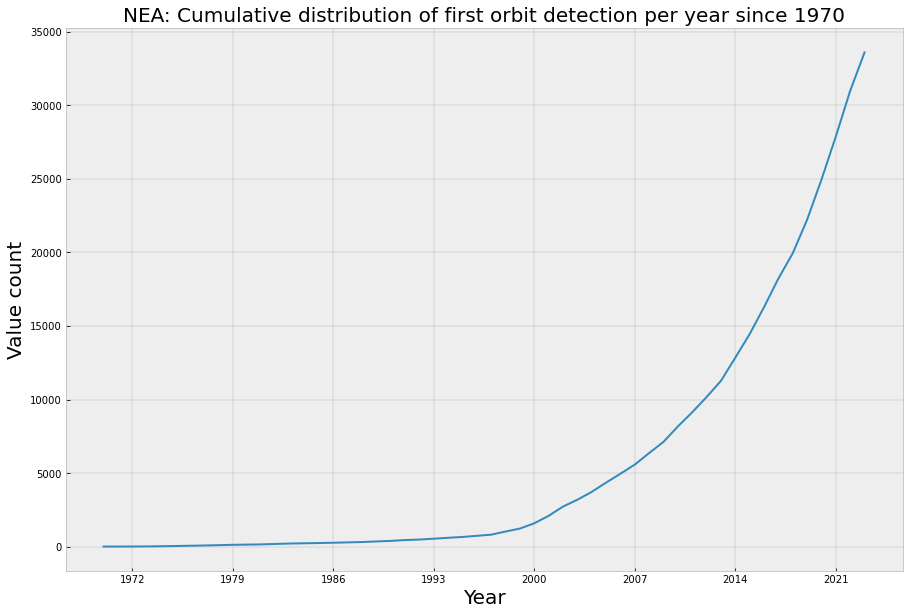

In [11]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.style.use('bmh')
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
nea_per_year.cumsum().plot()
plt.title(f'NEA: Cumulative distribution of first orbit detection per year since {initDate}', fontsize = 20)
axes.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Value count', fontsize=20)
axes.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/NEA_cumulative_Distribution.png") 

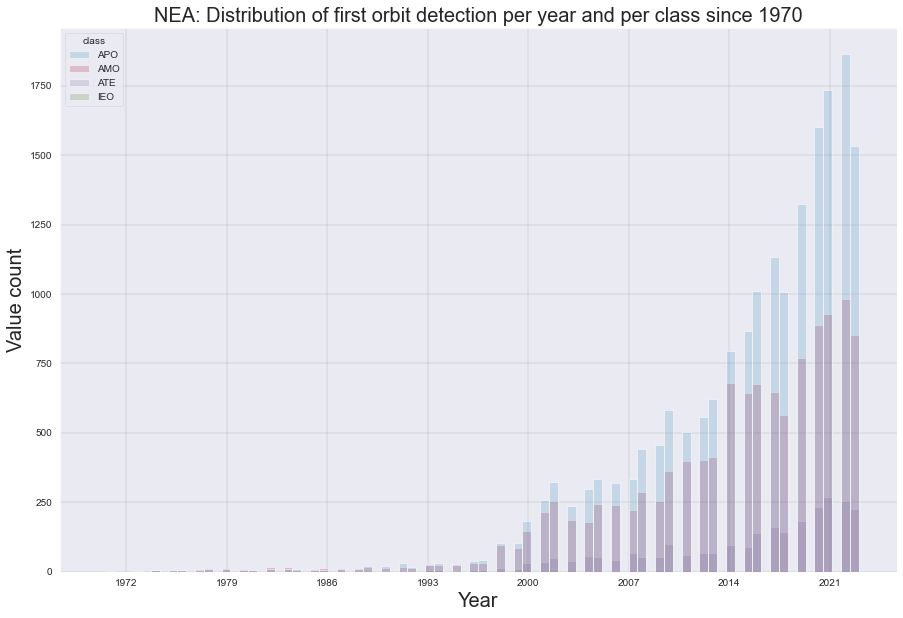

In [12]:
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(15, 10))
g = sns.histplot(data=df[df["year_first_obs"]>=initDate], x="year_first_obs", kde=False, hue="class",alpha = .2,)
g.set_title(f'NEA: Distribution of first orbit detection per year and per class since {initDate}', fontsize = 20)
axes.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Value count', fontsize=20)
sns.set(font_scale=1, style="ticks")
axes.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/NEA_Distribution.png") 

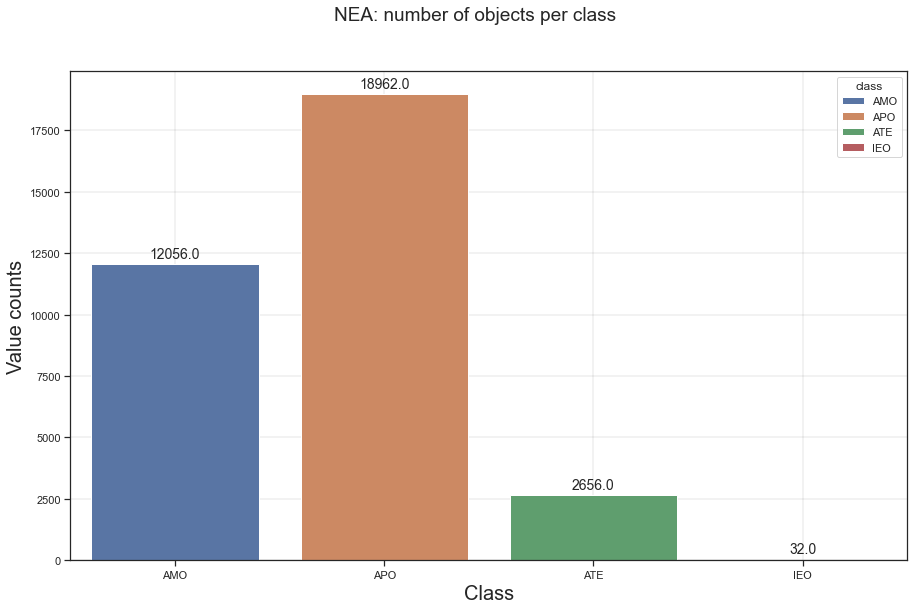

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
ax = sns.countplot(x='class', hue='class', dodge=False, data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14, xytext = (0,+10), textcoords = 'offset points')
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.suptitle('NEA: number of objects per class', fontsize=19)
plt.xlabel("Class", size=20)
plt.ylabel("Value counts", size=20)
plt.savefig("images/NEA_Object_Per_Class.png") 

In [14]:
percPha = pd.DataFrame()
print ("Percentuale dei NEA pericolosi (PHA)")
percPha['Percentage Hazardous NEA'] = df["pha"].value_counts() / len(df) * 100.0
percPha['Percentage Hazardous NEA'] = percPha['Percentage Hazardous NEA'].apply(lambda x: str(x) + " %")
percPha = percPha.rename(index = {0:'Not PHA NEA', 1:'PHA NEA'})
percPha

Percentuale dei NEA pericolosi (PHA)


Percentage Hazardous NEA
Not PHA NEA      92.90927431317866 %
PHA NEA         7.0907256868213375 %

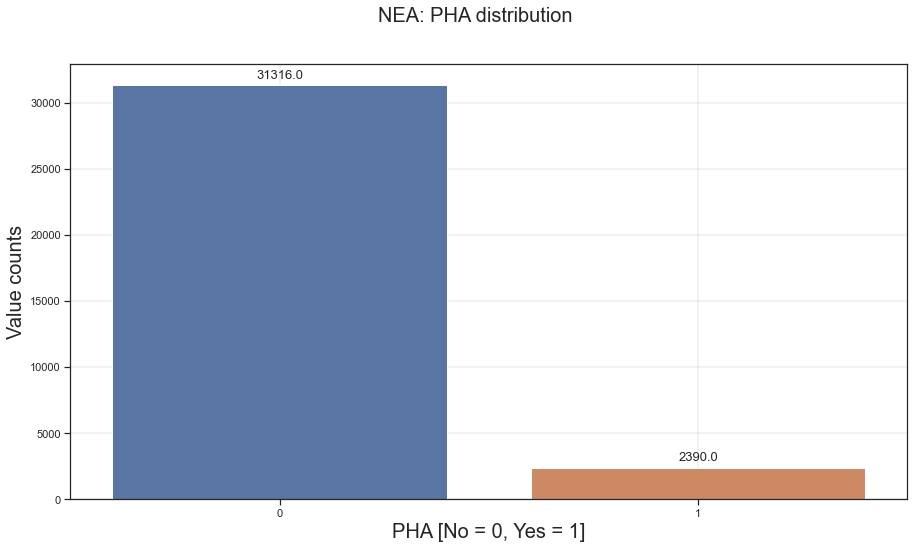

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
splot=sns.countplot(x="pha", data=df, order = df['pha'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, +10), textcoords = 'offset points')
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.suptitle('NEA: PHA distribution', fontsize=20)
plt.xlabel("PHA [No = 0, Yes = 1]", size=20)
plt.ylabel("Value counts", size=20)
plt.savefig("images/NEA_PHA_Distribution.png") 

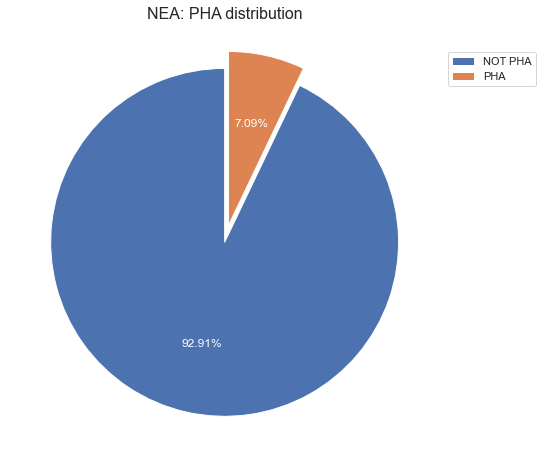

In [16]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt

explode = (0, 0.1)
fig = plt.figure(figsize = (8, 8), facecolor='w')
out_df=pd.DataFrame(df.groupby('pha')['pha'].count())

patches, texts, autotexts = plt.pie(out_df['pha'], autopct='%1.2f%%',
                                    textprops={'color': "w"},
                                    explode=explode, startangle=90)

plt.legend(labels=['NOT PHA','PHA'], bbox_to_anchor=(1., .95))
plt.title('NEA: PHA distribution', fontsize=16)
plt.savefig('images/NEA_PHA_PIE_Distribution.png')

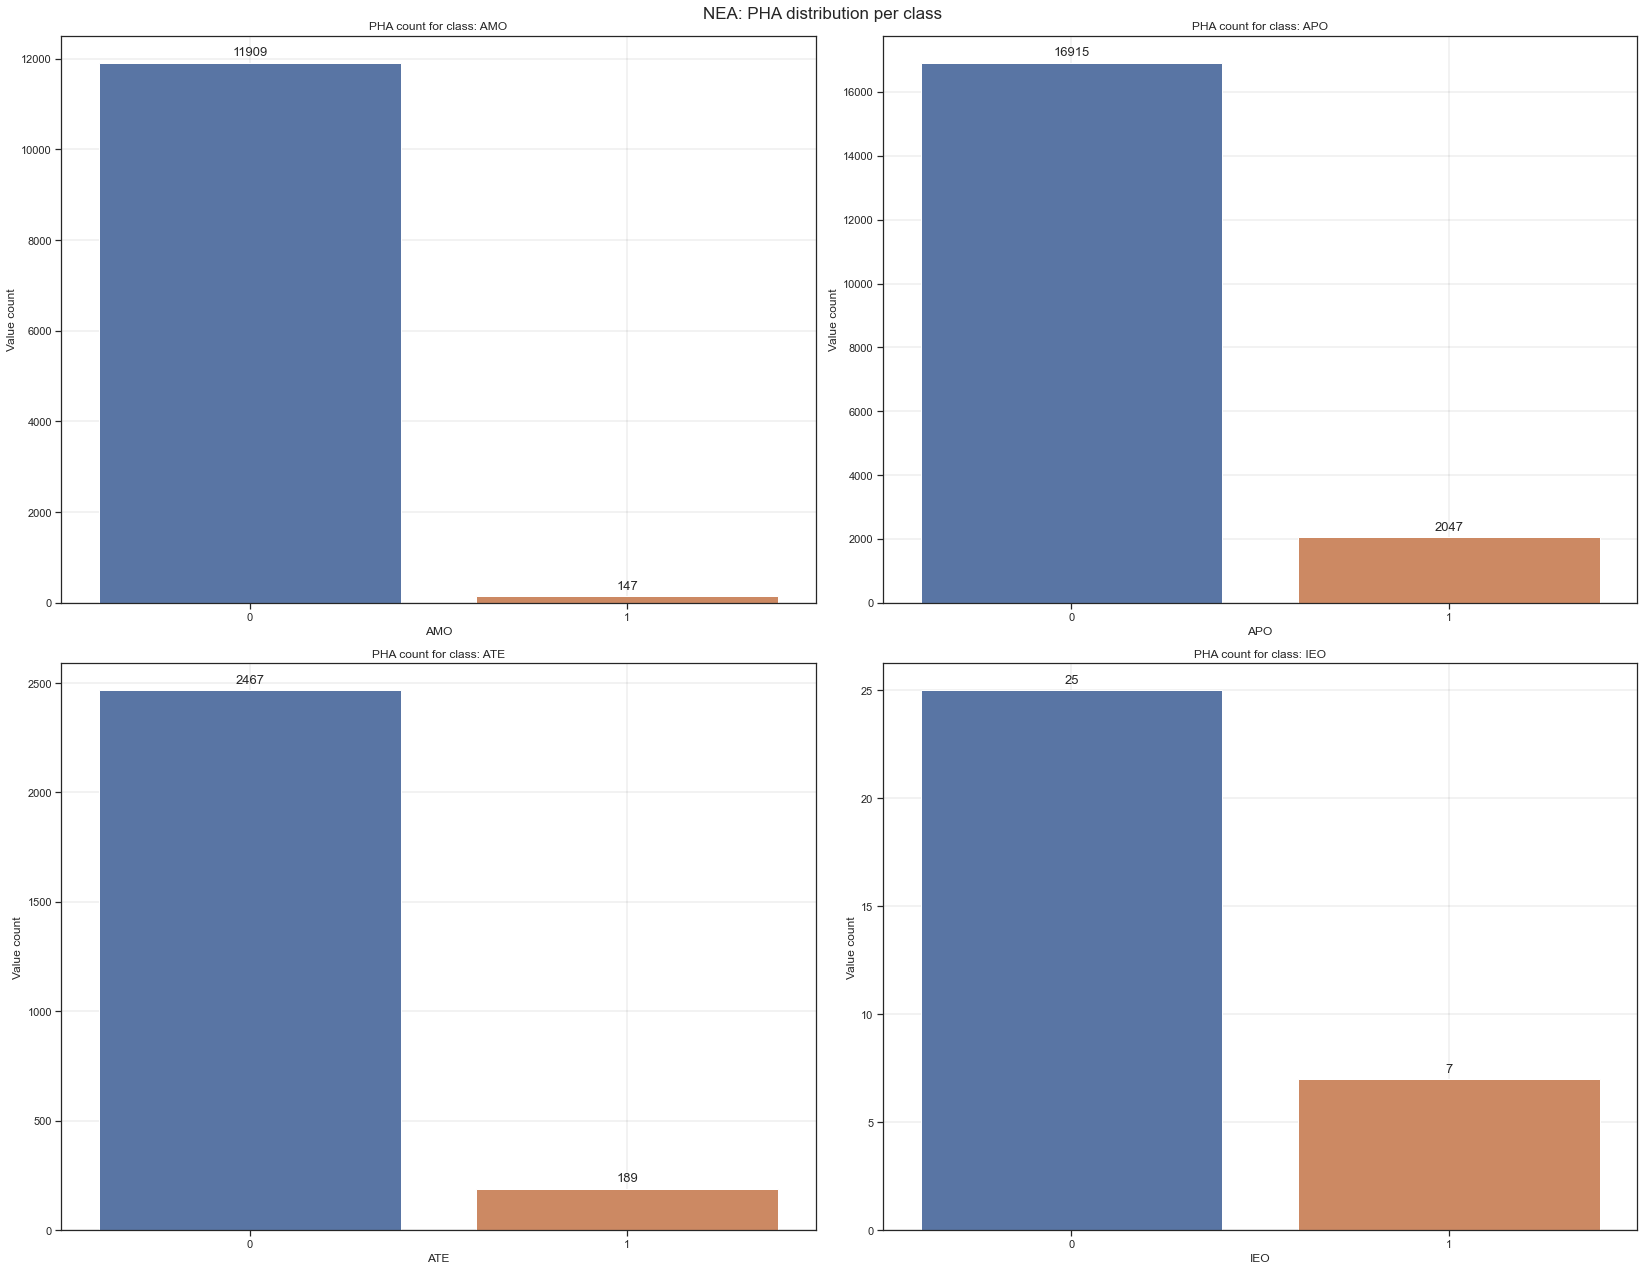

In [17]:
import seaborn as sns

n_row=2
n_col=2
counter=0
row = 0
fig, axes = plt.subplots(n_row, n_col, figsize=(23, 18))
fig.suptitle('NEA: PHA distribution per class', fontsize=17)

classList = df['class'].unique().tolist()
for sample in range(0, (n_col * n_row)):
    col = sample % n_col
    classNeo = classList[sample]
    dfClassNeo = df[df['class'] ==classNeo]
    g = sns.countplot(x="pha", data=dfClassNeo, order = dfClassNeo['pha'].value_counts().index, ax=axes[row, col])
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=13, xytext = (0, +10), textcoords = 'offset points')
    axes[row, col].set(xlabel=classNeo, ylabel='Value count', title=f'PHA count for class: {classNeo}')
    axes[row, col].grid(color='black', linestyle='-', linewidth=0.1)
    if col == (n_col - 1):
        row = row + 1
    counter+=1

fig.tight_layout()
plt.savefig("images/NEA_PHA_Distribution_per_Class.png") 

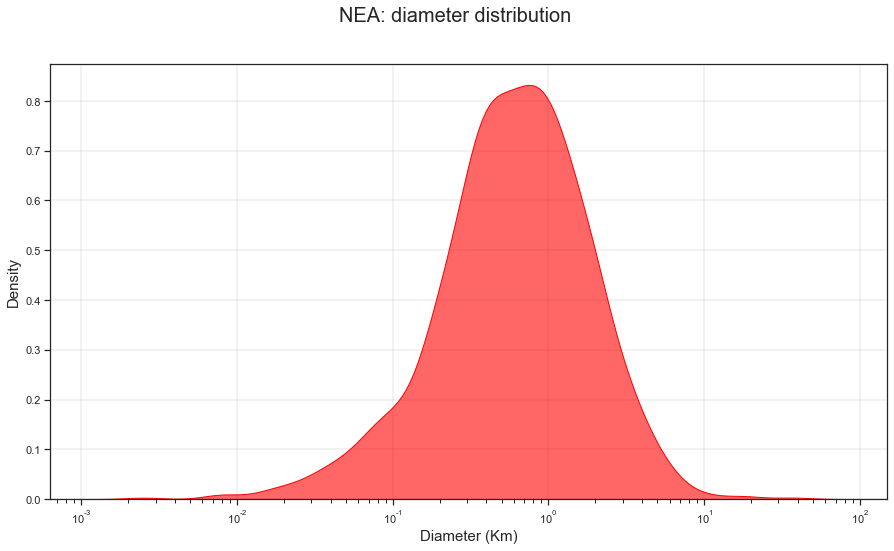

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('NEA: diameter distribution', fontsize=20)

sns.kdeplot(data=df, x='diameter',fill=True, alpha=.6, log_scale=True, color='Red')
ax.set_xlabel('Diameter (Km)', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/NEA_Distribution_per_Diameter.png") 

C:\Users\alfumaga2001\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\alfumaga2001\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


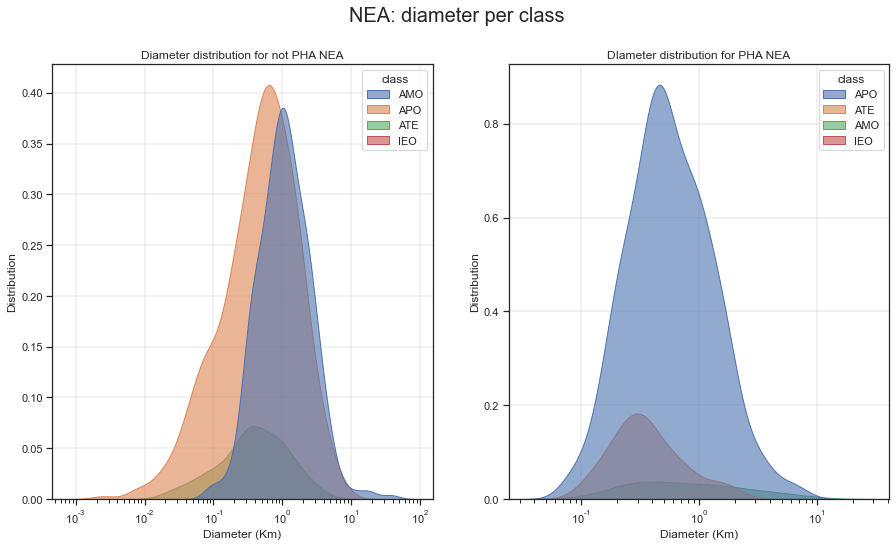

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('NEA: diameter per class', fontsize=20)

df_not_pha = df[df["pha"]==0]
sns.kdeplot(data=df_not_pha, x='diameter',fill=True, alpha=.6, log_scale=True, hue='class', ax = axes[0])
axes[0].set_title('Diameter distribution for not PHA NEA', fontsize=12)
axes[0].set_xlabel('Diameter (Km)', fontsize=12)
axes[0].set_ylabel('Distribution', fontsize=12)
axes[0].grid(color='black', linestyle='-', linewidth=0.1)

df_pha = df[df["pha"]==1]
sns.kdeplot(data=df_pha, x='diameter',fill=True, alpha=.6, log_scale=True, hue='class', ax = axes[1])
axes[1].set_title('DIameter distribution for PHA NEA', fontsize=12)
axes[1].set_xlabel('Diameter (Km)', fontsize=12)
axes[1].set_ylabel('Distribution', fontsize=12)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/NEA_Distribution_per_Diameter_per_Class.png") 

In [20]:
n_pha_median = df_not_pha['diameter'].median()
pha_median = df_pha['diameter'].median()
print (f'Valore mediano del diametro (Km) per i NEA non PHA: {n_pha_median} Km')
print (f'Valore mediano del diametro (Km) per i NEA PHA: {pha_median} Km')
print ()
n_pha_mean = df_not_pha['diameter'].mean()
pha_mean = df_pha['diameter'].mean()
print (f'Valore medio del diametro (Km) per i NEA non PHA: {n_pha_mean} Km')
print (f'Valore medio del diametro (Km) per i NEA PHA: {pha_mean} Km')

Valore mediano del diametro (Km) per i NEA non PHA: 0.6855 Km
Valore mediano del diametro (Km) per i NEA PHA: 0.495 Km

Valore medio del diametro (Km) per i NEA non PHA: 1.1258655973451326 Km
Valore medio del diametro (Km) per i NEA PHA: 0.7867976539589443 Km


# Diametro di un asteroide

Per stimare il diametro di un asteroide ci si basa:

- sull'albedo 
- magnitudine assoluta 
- alcune tabelle di confronto (https://cneos.jpl.nasa.gov/tools/ast_size_est.html)

$$
d = 10^{(3.1236 - 0.5 log_{10}(albedo) - 0.2H)}
$$

</p>
<center><img src="./figures/probabilita.jpg" alt="drawing" width="700"/></center>


# Diagramma di dispersione

Il diagramma di dispersione (**scatter diagram**) è utilizzato per studiare e identificare la possibile relazione tra due variabili. Viene utilizzato come strumento per convalidare la relazione tra cause ed effetti nell’analisi di un problema. 

Si tratta  di un grafico in cui i valori di due variabili sono riportati su due assi cartesiani e l’aggregazione dei punti risultanti indica il livello di correlazione o meno tra tali variabili

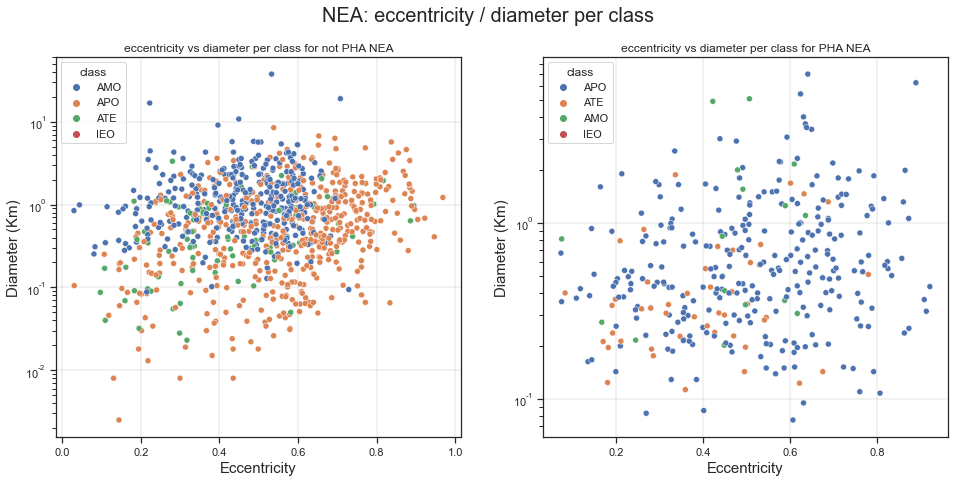

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('NEA: eccentricity / diameter per class', fontsize=20)

df_not_pha = df[df["pha"]==0]
sns.scatterplot(x="e", y="diameter", hue="class", data=df_not_pha, legend="full", ax = axes[0])
axes[0].set_title('eccentricity vs diameter per class for not PHA NEA', fontsize=12)
axes[0].set_xlabel('Eccentricity', fontsize=15)
axes[0].set_ylabel('Diameter (Km)', fontsize=15)
axes[0].grid(color='black', linestyle='-', linewidth=0.1)
axes[0].set_yscale('log')

df_pha = df[df["pha"]==1]
sns.scatterplot(x="e", y="diameter", hue="class", data=df_pha, ax = axes[1])
axes[1].set_title('eccentricity vs diameter per class for PHA NEA', fontsize=12)
axes[1].set_xlabel('Eccentricity', fontsize=15)
axes[1].set_ylabel('Diameter (Km)', fontsize=15)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
axes[1].set_yscale('log')
plt.savefig("images/NEA_Scatter_e_a.png") 

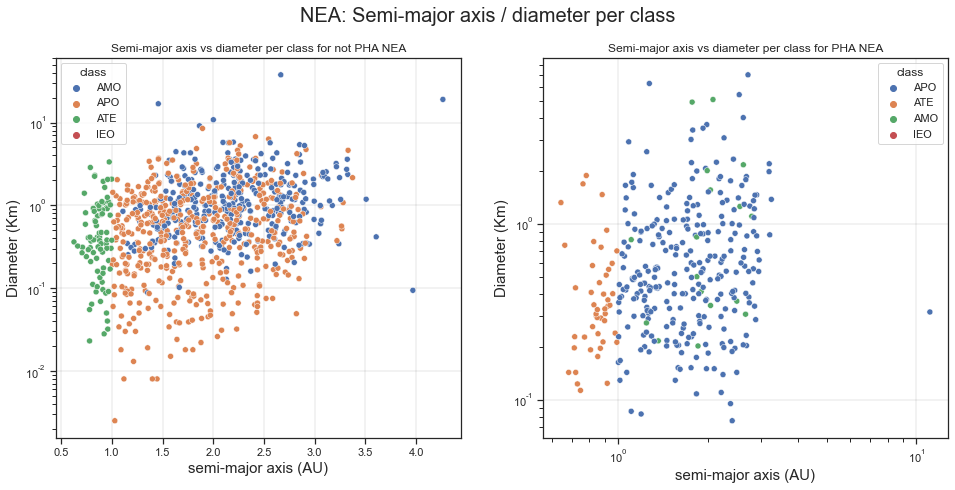

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('NEA: Semi-major axis / diameter per class', fontsize=20)

df_not_pha = df[df["pha"]==0]
sns.scatterplot(x="a", y="diameter", hue="class", data=df_not_pha, legend="full", ax = axes[0])
axes[0].set_title('Semi-major axis vs diameter per class for not PHA NEA', fontsize=12)
axes[0].set_xlabel('semi-major axis (AU)', fontsize=15)
axes[0].set_ylabel('Diameter (Km)', fontsize=15)
axes[0].grid(color='black', linestyle='-', linewidth=0.1)
axes[0].set_yscale('log')

df_pha = df[df["pha"]==1]
sns.scatterplot(x="a", y="diameter", hue="class", data=df_pha, ax = axes[1])
axes[1].set_title('Semi-major axis vs diameter per class for PHA NEA', fontsize=12)
axes[1].set_xlabel('semi-major axis (AU)', fontsize=15)
axes[1].set_ylabel('Diameter (Km)', fontsize=15)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
plt.savefig("images/NEA_Scatter_a_d.png") 

In [23]:
MPC_NEO_filter = df [['H','e','a','i','q','Q','class']]
nums = ['H','e','a','i']
for sample in range(0, len(nums) - 1):
    min_v = MPC_NEO_filter[nums[sample]].min()
    max_v = MPC_NEO_filter[nums[sample]].max()
    sel_class = df.loc[df[nums[sample]] == min][['class']].to_string(header=True,index=False,index_names=False).split('\n')
    sel_name = df.loc[df[nums[sample]] == min][['full_name']].to_string(header=True,index=False,index_names=False).split('\n')
    sel_name_new = [s.strip() for s in sel_name]
    print (f'{nums[sample]}(min_v,max_v) = [{MPC_NEO_filter[nums[sample]].min()},{max}] CLASS: {sel_class[1]} NAME: {sel_name_new[1]}')

H(min_v,max_v) = [9.26,<built-in function max>] CLASS: Columns: [class] NAME: Columns: [full_name]
e(min_v,max_v) = [0.0028,<built-in function max>] CLASS: Columns: [class] NAME: Columns: [full_name]
a(min_v,max_v) = [0.4617,<built-in function max>] CLASS: Columns: [class] NAME: Columns: [full_name]


In [24]:
#df[df.a >= 5]
#df.drop(df[df['a'] >= 5].index, inplace = True)

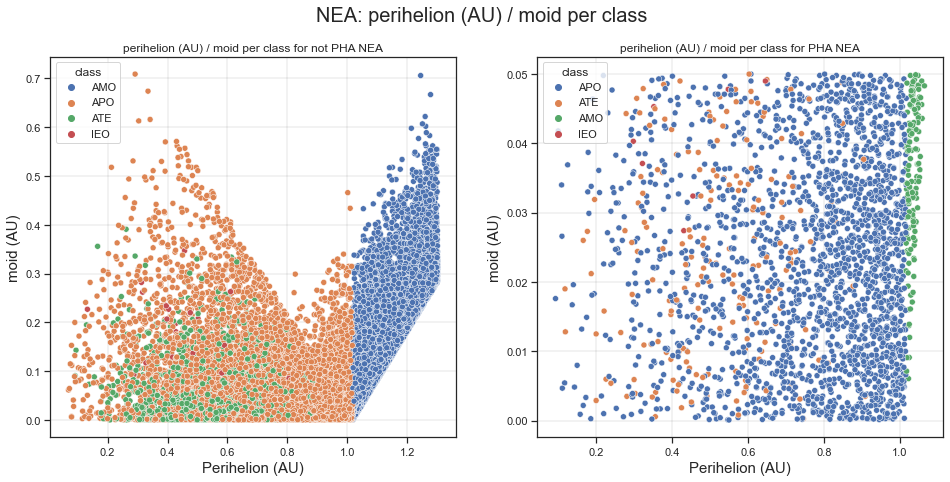

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('NEA: perihelion (AU) / moid per class', fontsize=20)

df_not_pha = df[df["pha"]==0]
axes[0].set_title('perihelion (AU) / moid per class for not PHA NEA', fontsize=12)
sns.scatterplot(x="q", y="moid", hue="class", data=df_not_pha, legend="full", ax = axes[0])
axes[0].set_xlabel('Perihelion (AU)', fontsize=15)
axes[0].set_ylabel('moid (AU)', fontsize=15)
axes[0].grid(color='black', linestyle='-', linewidth=0.1)

df_pha = df[df["pha"]==1]
sns.scatterplot(x="q", y="moid", hue="class", data=df_pha, ax = axes[1])
axes[1].set_title('perihelion (AU) / moid per class for PHA NEA', fontsize=12)
axes[1].set_xlabel('Perihelion (AU)', fontsize=15)
axes[1].set_ylabel('moid (AU)', fontsize=15)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/NEA_Scatter_q_moid.png") 

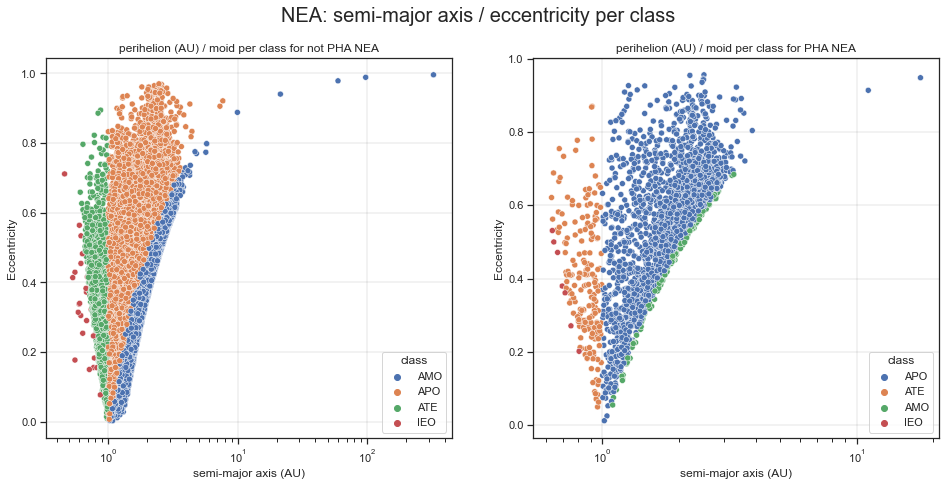

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('NEA: semi-major axis / eccentricity per class', fontsize=20)

df_not_pha = df[df["pha"]==0]
sns.scatterplot(x="a", y="e", hue="class", data=df_not_pha, legend="full", ax = axes[0])
axes[0].set_title('perihelion (AU) / moid per class for not PHA NEA', fontsize=12)
axes[0].set_xlabel('semi-major axis (AU)', fontsize=12)
axes[0].set_ylabel('Eccentricity', fontsize=12)
axes[0].grid(color='black', linestyle='-', linewidth=0.1)
axes[0].set_xscale('log')

df_pha = df[df["pha"]==1]
sns.scatterplot(x="a", y="e", hue="class", data=df_pha, legend="full", ax = axes[1])
axes[1].set_title('perihelion (AU) / moid per class for PHA NEA', fontsize=12)
axes[1].set_xlabel('semi-major axis (AU)', fontsize=12)
axes[1].set_ylabel('Eccentricity', fontsize=12)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
axes[1].set_xscale('log')
plt.savefig("images/NEA_Scatter_a_e.png") 

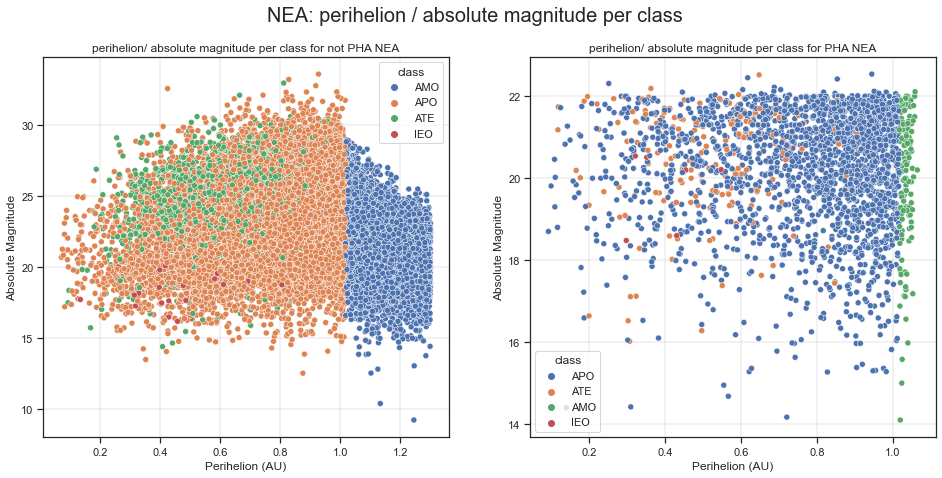

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('NEA: perihelion / absolute magnitude per class', fontsize=20)

df_not_pha = df[df["pha"]==0]
sns.scatterplot(x="q", y="H", hue="class", data=df_not_pha, legend="full", ax = axes[0])
axes[0].set_title('perihelion/ absolute magnitude per class for not PHA NEA', fontsize=12)
axes[0].set_xlabel('Perihelion (AU)', fontsize=12)
axes[0].set_ylabel('Absolute Magnitude', fontsize=12)
axes[0].grid(color='black', linestyle='-', linewidth=0.1)

df_pha = df[df["pha"]==1]
sns.scatterplot(x="q", y="H", hue="class", data=df_pha, legend="full", ax = axes[1])
axes[1].set_title('perihelion/ absolute magnitude per class for PHA NEA', fontsize=12)
axes[1].set_xlabel('Perihelion (AU)', fontsize=12)
axes[1].set_ylabel('Absolute Magnitude', fontsize=12)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/NEA_Scatter_q_H.png") 

## Diagramma dei parametri orbitali

Distribuzione dei valori dei principali parametri orbitali per le 4 classi di NEA

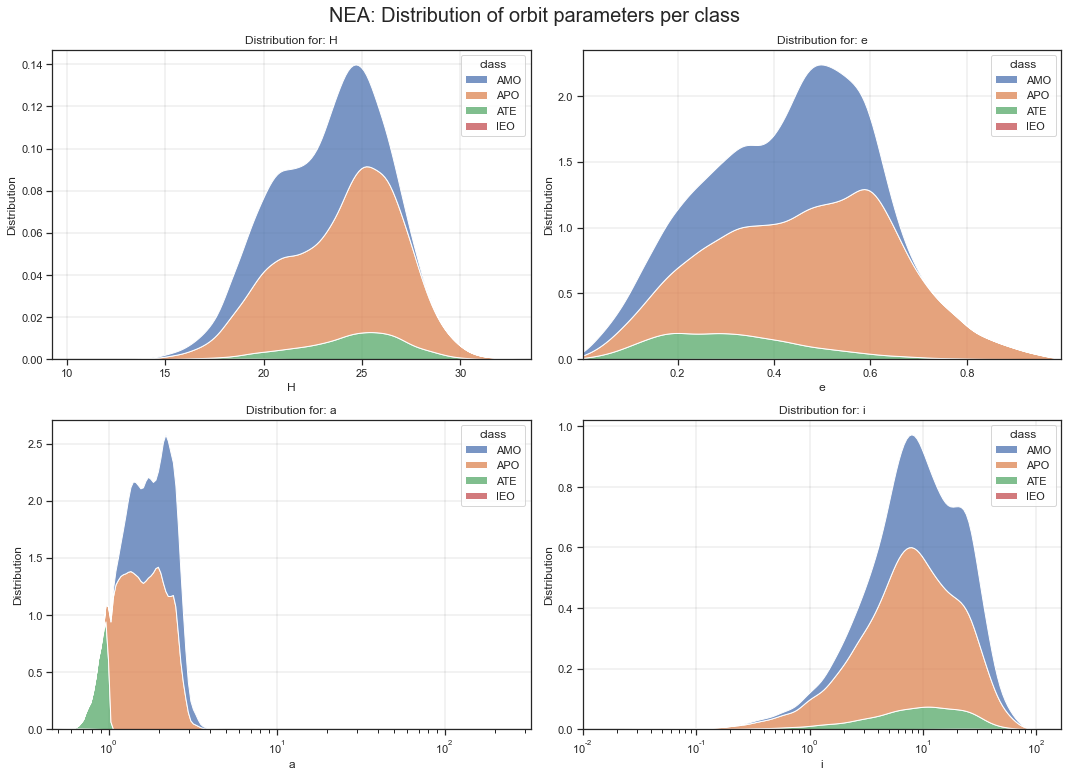

In [28]:
import seaborn as sns

MPC_NEO_filter = df [['H','e','a','i','class']]
nums = ['H','e','a','i']
n_row=2
n_col=2
counter=0
row = 0
fig, axes = plt.subplots(n_row, n_col, figsize=(15, 11))
fig.suptitle('NEA: Distribution of orbit parameters per class', fontsize=20)

for sample in range(0, (n_col * n_row)):
    col = sample % n_col
    if nums[sample] == 'a' or nums[sample] == 'i':
        sns.kdeplot(data=MPC_NEO_filter,x=nums[sample],hue="class", ax=axes[row, col], multiple="stack", log_scale=True)
    else:
        sns.kdeplot(data=MPC_NEO_filter,x=nums[sample],hue="class", ax=axes[row, col], multiple="stack")
    axes[row, col].set_title(nums[sample])
    min_val = MPC_NEO_filter[nums[sample]].min()
    max_val = MPC_NEO_filter[nums[sample]].max()
    axes[row, col].set_xlim(min_val, max_val)
    axes[row, col].set(xlabel=nums[sample], ylabel='Distribution', title='Distribution for: ' + str(nums[sample]))
    axes[row, col].grid(color='black', linestyle='-', linewidth=0.1)
    if col == (n_col - 1):
        row = row + 1
    counter+=1

fig.tight_layout()
plt.savefig("images/NEA_Distribution_others_class.png") 

Distribuzione dei valori dei principali parametri orbitali per i NEA potenzialmente pericolosi e non.

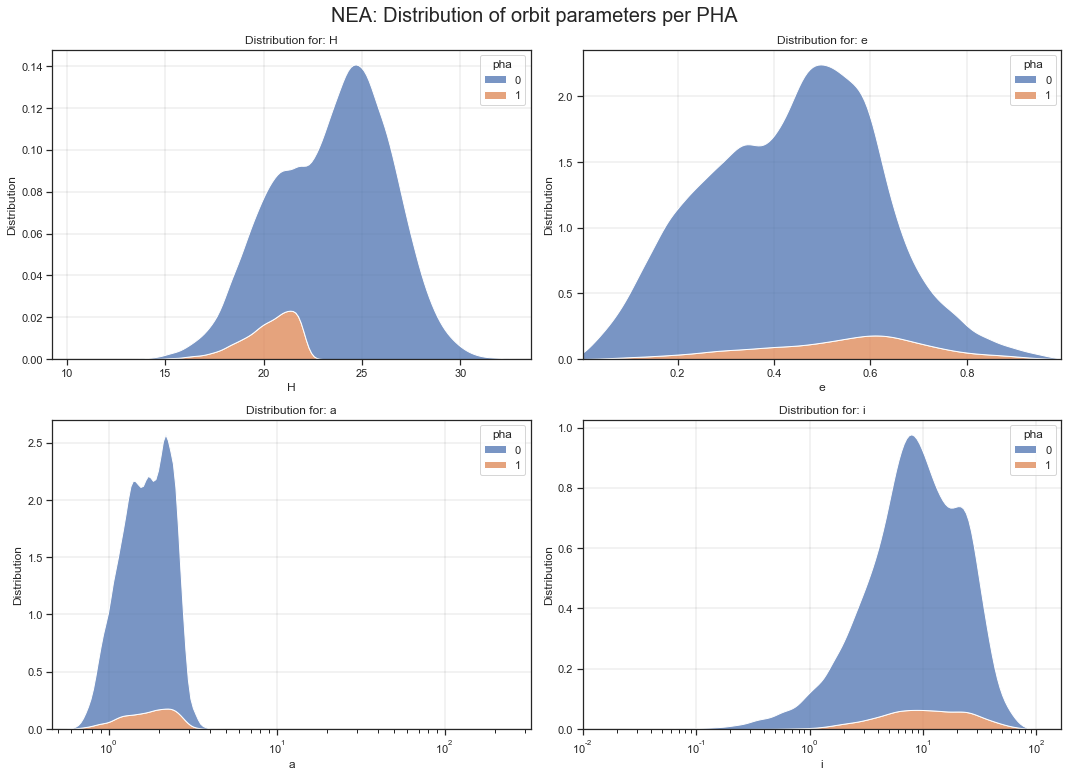

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

MPC_NEO_filter = df [['H','e','a','i','pha']]
nums = ['H','e','a','i']
n_row=2
n_col=2
counter=0
row = 0
fig, axes = plt.subplots(n_row, n_col, figsize=(15, 11))
fig.suptitle('NEA: Distribution of orbit parameters per PHA', fontsize=20)

for sample in range(0, (n_col * n_row)):
    col = sample % n_col
    if nums[sample] == 'a' or nums[sample] == 'i':
        sns.kdeplot(data=MPC_NEO_filter,x=nums[sample],hue="pha", ax=axes[row, col], multiple="stack", log_scale=True)
    else:
        sns.kdeplot(data=MPC_NEO_filter,x=nums[sample],hue="pha", ax=axes[row, col], multiple="stack")
    axes[row, col].set_title(nums[sample])
    min_val = MPC_NEO_filter[nums[sample]].min()
    max_val = MPC_NEO_filter[nums[sample]].max()
    axes[row, col].set_xlim(min_val, max_val)
    axes[row, col].set(xlabel=nums[sample], ylabel='Distribution', title='Distribution for: ' + str(nums[sample]))
    axes[row, col].grid(color='black', linestyle='-', linewidth=0.1)
    if col == (n_col - 1):
        row = row + 1
    counter+=1

fig.tight_layout()
plt.savefig("images/NEA_Distribution_others_pha.png") 

<center><img src="./figures/torino.jpg" width="1500" height="1200" /></center>

<center><img src="./figures/palermo.jpg" width="1500" height="1200" /></center>

## Integrazione della soluzione (calcolo delle orbite) per un sottoinsieme di NEA

In [30]:
import datetime
period = 365
N_output = 36
MAX_OBJECT  = 50
times = np.linspace(0, period, num = N_output) 
NEO_classes = ['ATE', 'APO', 'AMO', 'IEO']
current_time = datetime.datetime.now()
print("*** Current timestamp is:", current_time)

*** Current timestamp is: 2024-01-23 20:37:57.621497


### Read orbital parameter data from NASA Horizon database and integrate solution

In [31]:
import numpy as np
import rebound
import datetime
import re, os

foundFile = True
positionFile = ['x_pos', 'y_pos', 'z_pos']
for i in positionFile:
    fileName = ''
    if isLinuxPlatform():
        fileName = 'data/' + i + '.bin'
    else:
        fileName = f"data\\{i}.bin"
    print (fileName)
    if not os.path.isfile(fileName):
        foundFile = False
        break
    
if foundFile == False:
    current_time = datetime.datetime.now()
    print("*** Current timestamp is:", current_time)

    sim = rebound.Simulation()
    print(f"*** step: {sim.dt}") 
    sim.units = ['mearth','day','AU']
    sim.add('Sun')
    sim.add('Earth')
    sim.move_to_com()

    x_pos = np.zeros((MAX_OBJECT * len(NEO_classes), N_output)) 
    y_pos = np.zeros((MAX_OBJECT * len(NEO_classes), N_output))
    z_pos = np.zeros((MAX_OBJECT * len(NEO_classes), N_output))

    object_index = 0
    for cl in NEO_classes: 
        neo_class_column = df [df['class'] == cl]
        print (f'Working with: {cl}')
        name = neo_class_column ['full_name'].tolist()

        for x in name:
            objectCode = re.findall(r'\(.*?\)', x)
            firstName = objectCode[0]
            neo = firstName[1:-1]
            sim.add(neo)
            for position, t in enumerate (times):
                sim.integrate(t)
                x_pos[object_index, position] = sim.particles[object_index].x
                y_pos[object_index, position] = sim.particles[object_index].y
                z_pos[object_index, position] = sim.particles[object_index].z

            object_index = object_index + 1
            if ((object_index % MAX_OBJECT) == 0):
                break
else:
    print (f'NEA data already present on file system')
    object_index = MAX_OBJECT * len(NEO_classes)

data\x_pos.bin
data\y_pos.bin
data\z_pos.bin
NEA data already present on file system


### Save data

In [32]:
import os
import pickle

if isLinuxPlatform():
    fileName = 'data/x_pos.bin'
else:
    fileName = f"data\\x_pos.bin"
if not os.path.isfile(fileName):
    file = open(fileName, 'wb')
    pickle.dump(x_pos, file)
    file.close()
    print (f'file: {fileName} saved')
else:
    print (f'file: {fileName} already exists')
        
if isLinuxPlatform():
    fileName = 'data/y_pos.bin'
else:
    fileName = f"data\\y_pos.bin"
if not os.path.isfile(fileName):
    file = open(fileName, 'wb')
    pickle.dump(y_pos, file)
    file.close()
    print (f'file: {fileName} saved')
else:
    print (f'file: {fileName} already exists')
    
if isLinuxPlatform():
    fileName = 'data/z_pos.bin'
else:
    fileName = f"data\\z_pos.bin"
if not os.path.isfile(fileName):
    file = open(fileName, 'wb')
    pickle.dump(z_pos, file)
    file.close()
    print (f'file: {fileName} saved')
else:
    print (f'file: {fileName} already exists')    

file: data\x_pos.bin already exists
file: data\y_pos.bin already exists
file: data\z_pos.bin already exists


### Generate orbital diagram and build gif picture

In [33]:
import pickle

if isLinuxPlatform():
    fileName = 'data/x_pos.bin'
else:
    fileName = f"data\\x_pos.bin"
file = open(fileName, 'rb')
x_pos = pickle.load(file)
file.close()

if isLinuxPlatform():
    fileName = 'data/y_pos.bin'
else:
    fileName = f"data\\y_pos.bin"
file = open(fileName, 'rb')
y_pos = pickle.load(file)
file.close()

if isLinuxPlatform():
    fileName = 'data/z_pos.bin'
else:
    fileName = f"data\\z_pos.bin"
file = open(fileName, 'rb')
z_pos = pickle.load(file)
file.close()

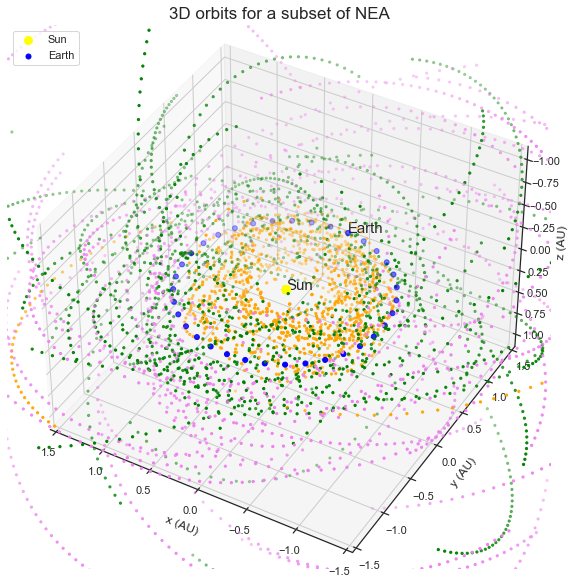

In [34]:
import matplotlib.pyplot as plt

limit_x = 1.5

fig_3d = plt.figure(figsize=(16, 10))
fig_3d.tight_layout(pad = 2.0)

row = 0
num_plot = 1

object_index = MAX_OBJECT * len(NEO_classes)

axs = fig_3d.add_subplot(1, 1, num_plot, projection='3d')

axs.scatter3D(x_pos[0], y_pos[0], z_pos[0], marker='.', color='yellow', s=250)
axs.text(x_pos[0][0], y_pos[0][0], z_pos[0][0], 'Sun', size=15)

axs.scatter3D(x_pos[1], y_pos[1], z_pos[1], marker='.', color='Blue', s=100)
axs.text(x_pos[1][0], y_pos[1][0], z_pos[1][0], 'Earth', size=15)

for obj in range(0, object_index):
    if obj >= MAX_OBJECT and obj < 2 * MAX_OBJECT:
          axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], color='Green', marker=".")
    if obj >= 2 * MAX_OBJECT and obj < 3 * MAX_OBJECT:
          axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], c= 'violet', marker=".")
    if obj >= 3 * MAX_OBJECT and obj < 4 * MAX_OBJECT:
          scat = axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], c= 'orange', marker=".")
    
axs.grid()
axs.set_title(f"3D orbits for a subset of NEA", fontsize=17)
axs.set_xlabel('x (AU)')
axs.set_ylabel('y (AU)')
axs.set_zlabel('z (AU)')
axs.set_xlim(-limit_x, limit_x)
axs.set_ylim(-limit_x, limit_x)
axs.set_zlim(-1.1, 1.1)
axs.view_init(-140, 60)

leg_list = ['Sun', 'Earth']
axs.legend(leg_list, loc='upper left')
plt.savefig("images/NEA_3D.png") 

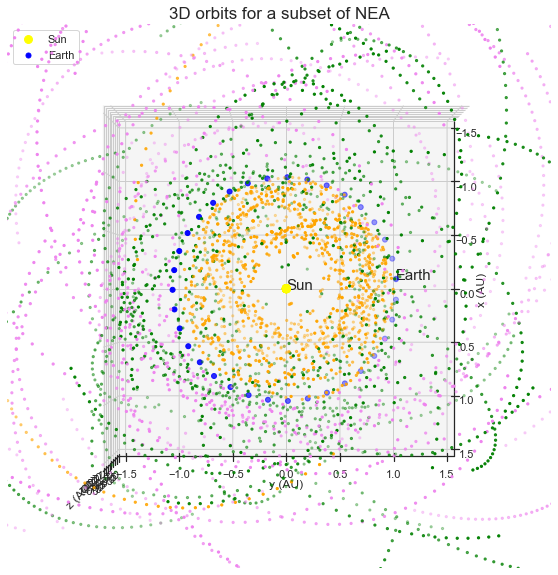

In [35]:
import matplotlib.pyplot as plt

limit_x = 1.5

fig_3d = plt.figure(figsize=(16, 10))
fig_3d.tight_layout(pad = 2.0)

row = 0
num_plot = 1

object_index = MAX_OBJECT * len(NEO_classes)

axs = fig_3d.add_subplot(1, 1, num_plot, projection='3d')

axs.scatter3D(x_pos[0], y_pos[0], z_pos[0], marker='.', color='yellow', s=250)
axs.text(x_pos[0][0], y_pos[0][0], z_pos[0][0], 'Sun', size=15)

axs.scatter3D(x_pos[1], y_pos[1], z_pos[1], marker='.', color='Blue', s=100)
axs.text(x_pos[1][0], y_pos[1][0], z_pos[1][0], 'Earth', size=15)

for obj in range(0, object_index):
    if obj >= MAX_OBJECT and obj < 2 * MAX_OBJECT:
          axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], color='Green', marker=".")
    if obj >= 2 * MAX_OBJECT and obj < 3 * MAX_OBJECT:
          axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], c= 'violet', marker=".")
    if obj >= 3 * MAX_OBJECT and obj < 4 * MAX_OBJECT:
          scat = axs.scatter3D(x_pos[obj], y_pos[obj], z_pos[obj], c= 'orange', marker=".")
    
axs.grid()
axs.set_title(f"3D orbits for a subset of NEA", fontsize=17)
axs.set_xlabel('x (AU)')
axs.set_ylabel('y (AU)')
axs.set_zlabel('z (AU)')
axs.set_xlim(-limit_x, limit_x)
axs.set_ylim(-limit_x, limit_x)
axs.set_zlim(-1, 1)
axs.view_init(90, 0)

leg_list = ['Sun', 'Earth']
axs.legend(leg_list, loc='upper left')
plt.savefig("images/NEA_3D_90.png") 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Introduzione dell'Intelligenza artificiale

<img src="./figures/ai.png" alt="drawing" width="100"/>

Costuiamo due sistemi di **classificazione con supervisione** basato su algoritmi di A.I. 

Si vule classificare i NEA per: 

- **pericolosità** (PHA, non PHA) 
- per **tipo** (ATE, APO, AMO ed IEO)

Algoritmi con supervisione: una classe di algoritmi per la classificazione che si basa su un modello di addestramento con dati etichettati per fare previsione su nuovi dati. 

Questo genere di algoritmi serve per risolvere problemi di classificazione e regressione.  

<p style="text-align: center;">Fonte: <a href="https://blog.hubspot.com/marketing/ai-algorithms">https://blog.hubspot.com/marketing/ai-algorithms</a></p>
<center><img src="./figures/AI_Learning.png" width="1300" height="1000" /></center>
<p>Filtriamo sui dati orbitali che ipotizziamo necessari alla classificazione e sostituiamo la classe con una numerazione, per ognuna delle 2 analisi.</p>

<center><img src="./figures/ModelTrain.png" width="800" height="600" /></center>
<p style="text-align: center;">Disegno dell'autore</p>

# Classificazione dei NEA in funzione della pericolosità

In [37]:
if isLinuxPlatform():
    df = pd.read_csv("data/sbdb_query_results.csv", low_memory=False)
else:
    df = pd.read_csv(r"data\sbdb_query_results.csv", low_memory=False)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

df = df[~df['pha'].isnull()]
df = df[~df['H'].isnull()]
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df.drop('BV', axis=1, inplace=True)
df.drop('UB', axis=1, inplace=True)
df.drop('per_y', axis=1, inplace=True)
df.rename(columns={"ad": "Q"}, inplace = True)
df = df[~df['q'].isnull()]
df = df[~df['Q'].isnull()]
df['full_name'] = df['full_name'].apply(lambda x: x.strip())
df = df.reset_index(drop=True)

In [38]:
MPC_NEO_filter = df [['H','a','q','Q','moid','class','pha']]
encodeLabel = {"class": {"AMO": 1, "APO": 2, "ATE": 3, "IEO": 4}}
MPC_NEO = MPC_NEO_filter.replace(encodeLabel)
MPC_NEO['pha'] = MPC_NEO['pha'].astype('float64')
MPC_NEO.head()

H    a    q    Q  moid  class  pha
0 10.42 1.46 1.13 1.78  0.15      1 0.00
1 15.59 2.64 1.19 4.08  0.20      1 0.00
2 13.88 2.47 1.06 3.88  0.08      1 0.00
3  9.26 2.67 1.25 4.09  0.34      1 0.00
4 17.38 1.92 1.08 2.76  0.10      1 0.00

## Matrice di correlazione

Una matrice di correlazione è una tecnica statistica per valutare la presenza di una relazione fra due variabili in un set di dati. In ogni cella è presente un coefficiente di correlazione.

- 1 significa che le due variabili hanno una relazione lineare diretta, vale a dire che all’aumentare di una aumenta anche l’altra
- 0 significa che non è possibile stabilire fra le due variabili un andamento lineare
- 1 significa che le due variabili hanno una relazione lineare inversa, vale a dire che all’aumentare di una, l’altra diminuisce

La **mappa di calore** è una visualizzazione grafica della matrice di correlazione

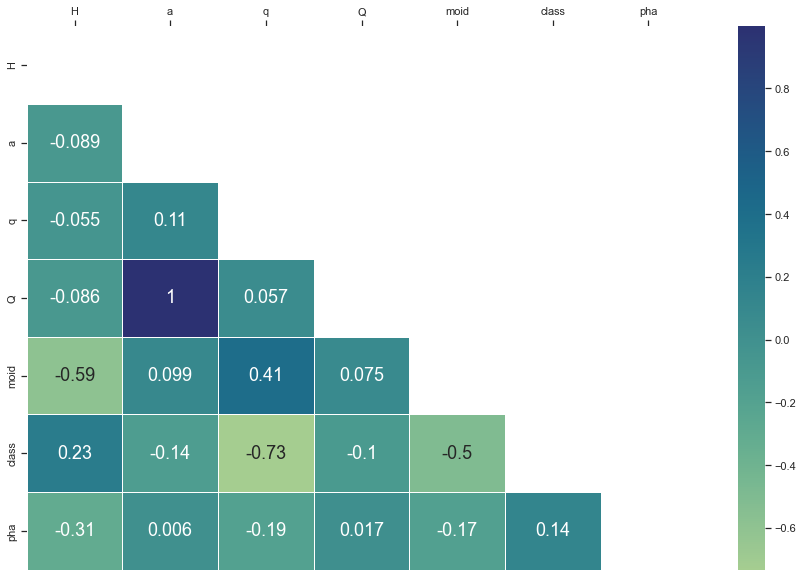

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 18})

mask = np.triu(np.ones_like(MPC_NEO.corr()))
ax = sns.heatmap(MPC_NEO.corr(), cmap="crest", annot=True, linewidth=.5, mask=mask)
sns.set(font_scale=0.8) 
ax.xaxis.tick_top()
plt.savefig("images/NEA_Corr_Matrix.png") 

## Suddivisione del dataset dei NEA in dati di addestramento e test

Suddivisione dei dati iniziali in training (35%) e test (65%) usati per la validazione 

Dati di input: 
- **moid**
- **H** 

Dati di output: 
- **pha**

Riscalare: 

- Uniformare i dati in un'unica scala commensurabile uguale ad ogni caratteristica

In [40]:
X = MPC_NEO[['moid', 'H']]
y = MPC_NEO['pha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1, stratify=y)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
y_train.value_counts()

0.00    20355
1.00     1553
Name: pha, dtype: int64

In [41]:
test_results = pd.DataFrame()
pd.options.display.float_format = '{:.5f}'.format

## Support Vector Machines (SVM) model
Il classificatore separa i punti usando un iperpiano con il massimo margine di separazione

SVM trova l'iperpiano ottimale (massimo) che separa il dataset in due zone entro i quali i nuovi dati verranno classificati. Lavora in maniera iterativa per minimizzare l'errore. 

E' un approccio statistico. (https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)

<center><img src="./figures/svm.png" width="700" height="500" /></center>
<p style="text-align: center;">Fonte: <a href="https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/">https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/</a></p>

In [42]:
from sklearn import svm

model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

model_svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {model_svm_accuracy}\n')
print (classification_report(y_test, y_pred))

SVM Accuracy: 0.9692320732327513

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     10961
         1.0       0.83      0.71      0.77       837

    accuracy                           0.97     11798
   macro avg       0.90      0.85      0.88     11798
weighted avg       0.97      0.97      0.97     11798



- **Accuracy**: quanto le predizioni sono vere?
- **Precision**: fra tutte quelle positive/negative, quante sono vere?
- **Recall**: Tra tutte quelle che dovrebbero essere previste come vere, quante lo sono veramente? (errore primo tipo)
- **F1 Score**: misura statistica che combina Recall e Precision

In [43]:
test_results = test_results.append({
    'Model':'SVM', 
    'Accuracy':model_svm_accuracy, 
}, ignore_index=True,)

In [44]:
# contour area
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)

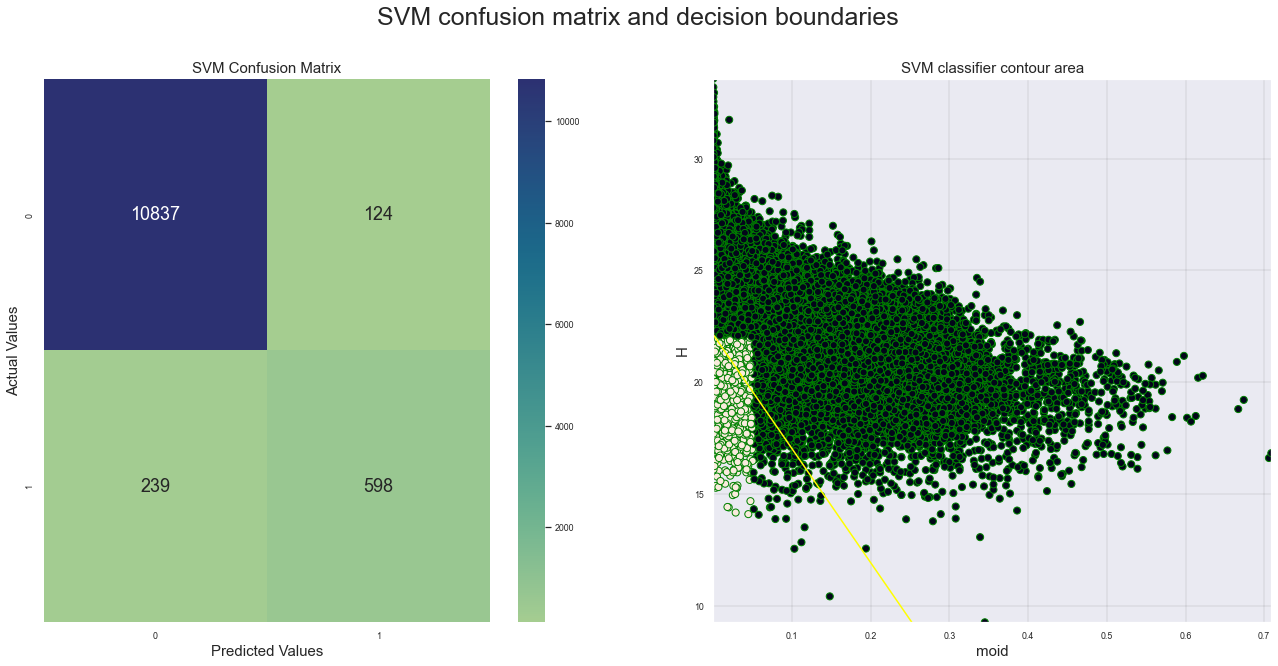

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplots(1, 2,figsize=(22,10))
fig.suptitle('SVM confusion matrix and decision boundaries', fontsize=25)
plt.rcParams.update({'font.size': 18})
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=True , cmap="crest", ax=axes[0])
axes[0].set_xlabel('Predicted Values', fontsize=15)
axes[0].set_ylabel('Actual Values', fontsize=15)
axes[0].set_title('SVM Confusion Matrix', fontsize=15)

x_min=X['moid'].min()
x_max=X['moid'].max()
y_min=X['H'].min()
y_max=X['H'].max()
clf = svm.SVC(kernel='linear').fit(X, y)
axes[1].set(xlim=(x_min, x_max), ylim=(y_min, y_max))
common_params = {"estimator": clf, "X": X, "ax": axes[1]}
#DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict", plot_method="pcolormesh", alpha=0.3)
DecisionBoundaryDisplay.from_estimator( **common_params, response_method="decision_function",
                                       plot_method="contour", levels=[0], colors=["yellow"],
                                       linestyles=["-"])

axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, edgecolors="green")
axes[1].set_xlabel('moid', fontsize=15)
axes[1].set_ylabel('H', fontsize=15)
axes[1].set_title('SVM classifier contour area', fontsize=15)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)

plt.savefig("images/SVM_Confusion_Matrix.png") 

### KNeighbors model

Il classificatore usa il concetto di prossimità per fare previsioni sul raggruppamento a cui appartiene il dato in esame/ Si basa sull'ipotesi che punti *simili* possono trovarsi vicini tra loro.

L'assegnazione avviene per maggioranza oppure per superamento di una soglia percentuale.

Serve introdurre il concetto di distanza. Bisogna definire una metrica.

- Distanza di **Hamming**
- Distanza di **Manhattan**
- Distanza **Euclidea**

<center><img src="./figures/knn.png" width="600" height="500" /></center>
<p style="text-align: center;">Fonte: <a href="https://www.researchgate.net/figure/Binary-classification-of-k-nearest-neighbor-classifier_fig1_338871013">https://www.researchgate.net/figure/Binary-classification-of-k-nearest-neighbor-classifier_fig1_338871013</a></p>

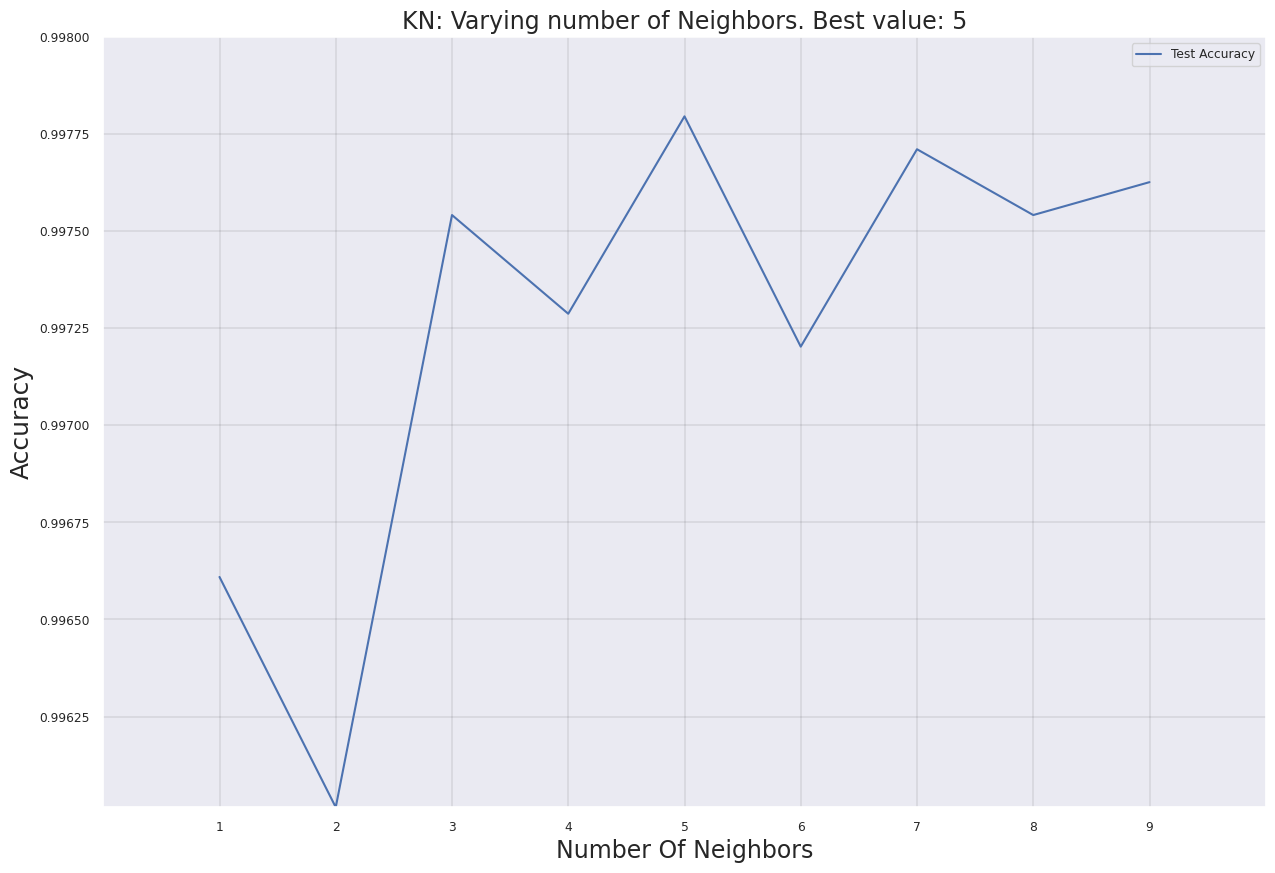

In [45]:
import matplotlib.pyplot as plt

test_score = {}
n_neighbors = np.arange(1, 10, 1)
min_value = 1
max_value = 0
for neighbor in n_neighbors:
    model_KN = KNeighborsClassifier(n_neighbors=neighbor)
    model_KN.fit(X_train, y_train)
    test_score[neighbor] = model_KN.score(X_test, y_test)

    minValue = test_score[neighbor]
    maxValue = test_score[neighbor]
    if minValue < min_value:
           min_value = minValue
    if maxValue > max_value:
           max_value = maxValue    
  
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors", fontsize=17)
plt.ylabel("Accuracy", fontsize=18)
plt.legend()
plt.xlim(0, 10)
plt.ylim(min_value, 0.998)

major_ticks = np.arange(1, 10, 1)
ax.set_xticks(major_ticks)

for key, value in test_score.items():
    if value==max(test_score.values()):
        break
plt.title(f"KN: Varying number of Neighbors. Best value: {key}", fontsize=17)
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/KNN_Optimum_K_PHA.png") 

In [46]:
model_KN = KNeighborsClassifier(key)
model_KN.fit(X_train, y_train)
y_pred = model_KN.predict(X_test)

model_KN_accuracy = accuracy_score(y_test, y_pred)
print(f'KNeighbors Accuracy: {model_KN_accuracy}\n')
print (classification_report(y_test, y_pred))

KNeighbors Accuracy: 0.9977962366502797

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10961
         1.0       0.99      0.98      0.98       837

    accuracy                           1.00     11798
   macro avg       0.99      0.99      0.99     11798
weighted avg       1.00      1.00      1.00     11798



In [47]:
test_results = test_results.append({
    'Model':'KNeighbors', 
    'Accuracy':model_KN_accuracy, 
}, ignore_index=True,)

/tmp/ipykernel_7143/2188714150.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({


In [48]:
# contour area
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_KN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)

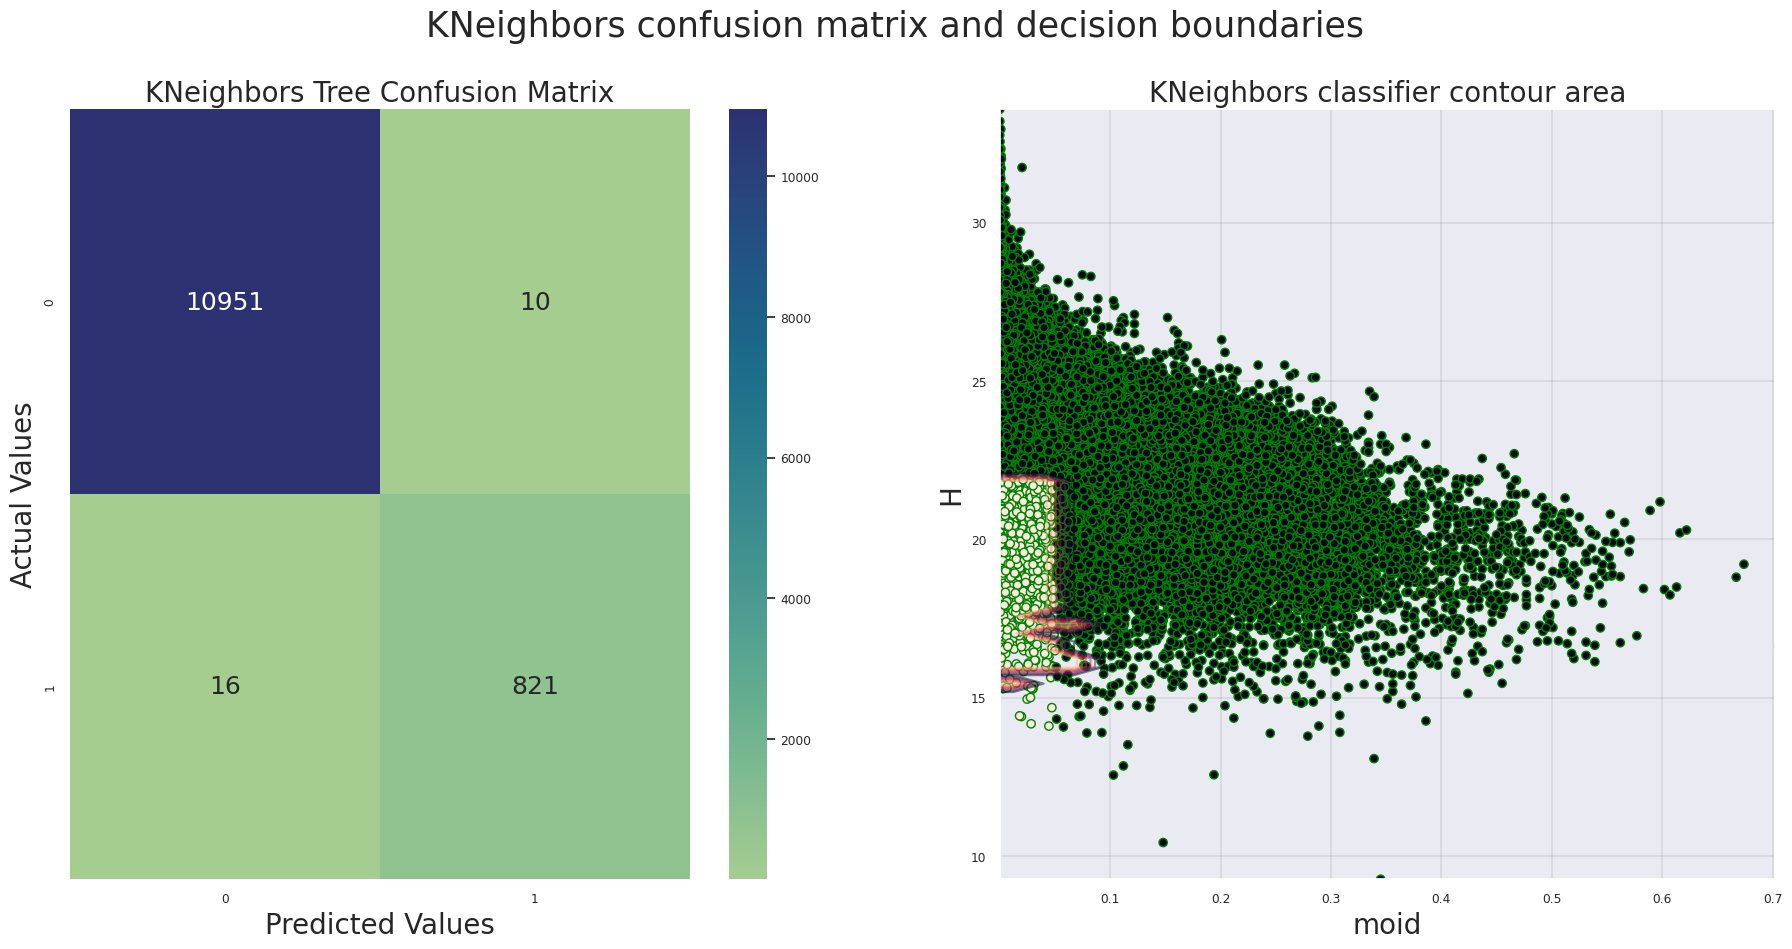

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

fig, axes = plt.subplots(1, 2,figsize=(22,10))
fig.suptitle('KNeighbors confusion matrix and decision boundaries', fontsize=25)
plt.rcParams.update({'font.size': 18})
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=True , cmap="crest", ax=axes[0])
axes[0].set_xlabel('Predicted Values', fontsize=20)
axes[0].set_ylabel('Actual Values', fontsize=20)
axes[0].set_title('KNeighbors Tree Confusion Matrix', fontsize=20)

classifier = model_KN.fit(X, y)
x_min=X['moid'].min()
x_max=X['moid'].max()
y_min=X['H'].min()
y_max=X['H'].max()
axes[1].set(xlim=(x_min, x_max), ylim=(y_min, y_max))
common_params = {"estimator": classifier, "X": X, "ax": axes[1]}
DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict", plot_method="contour", 
                                       xlabel="moid", ylabel='H', alpha=0.5)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="green")
plt.xlim(xx.min(), xx.max())
axes[1].set_xlabel('moid', fontsize=20)
axes[1].set_ylabel('H', fontsize=20)
axes[1].set_title('KNeighbors classifier contour area', fontsize=20)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)

plt.savefig("images/KNeighbors_Confusion_Matrix.png") 

### Decision tree model

E' un classificatore ad albero decisionale dove:

- ogni nodo rappresenta un attributo
- ogni diramazione una regola di decisione
- ogni foglia un risultato (previsione)

Si parte dalla radice e si partiziona il dataset in funzione del valore di un attributo. Si procede in maniera iterativa. Il processo è simile al procedimento decisionale dell'essere unamo.

Le principali misure utilizzate per le definizioni di attributo ed assegnamento dei nodi sono:

- **Information Gain** (basata sul valore di entropia)
- **Gain Ratio** (indice preferenza)
- **Gini Index** (basata su un calcolo probabilistico)

In [50]:
model_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=2)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

model_dt_accuracy = accuracy_score(y_test, y_pred)
print(f'DecisionTree Accuracy: {model_dt_accuracy}\n')
print (classification_report(y_test, y_pred))

DecisionTree Accuracy: 0.9977962366502797

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10961
         1.0       0.98      0.99      0.98       837

    accuracy                           1.00     11798
   macro avg       0.99      0.99      0.99     11798
weighted avg       1.00      1.00      1.00     11798



In [51]:
test_results = test_results.append({
    'Model':'Decision Tree', 
    'Accuracy':model_dt_accuracy, 
}, ignore_index=True,)

/tmp/ipykernel_7143/1754744344.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({


In [52]:
# contour area
x_min, x_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
y_min, y_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)

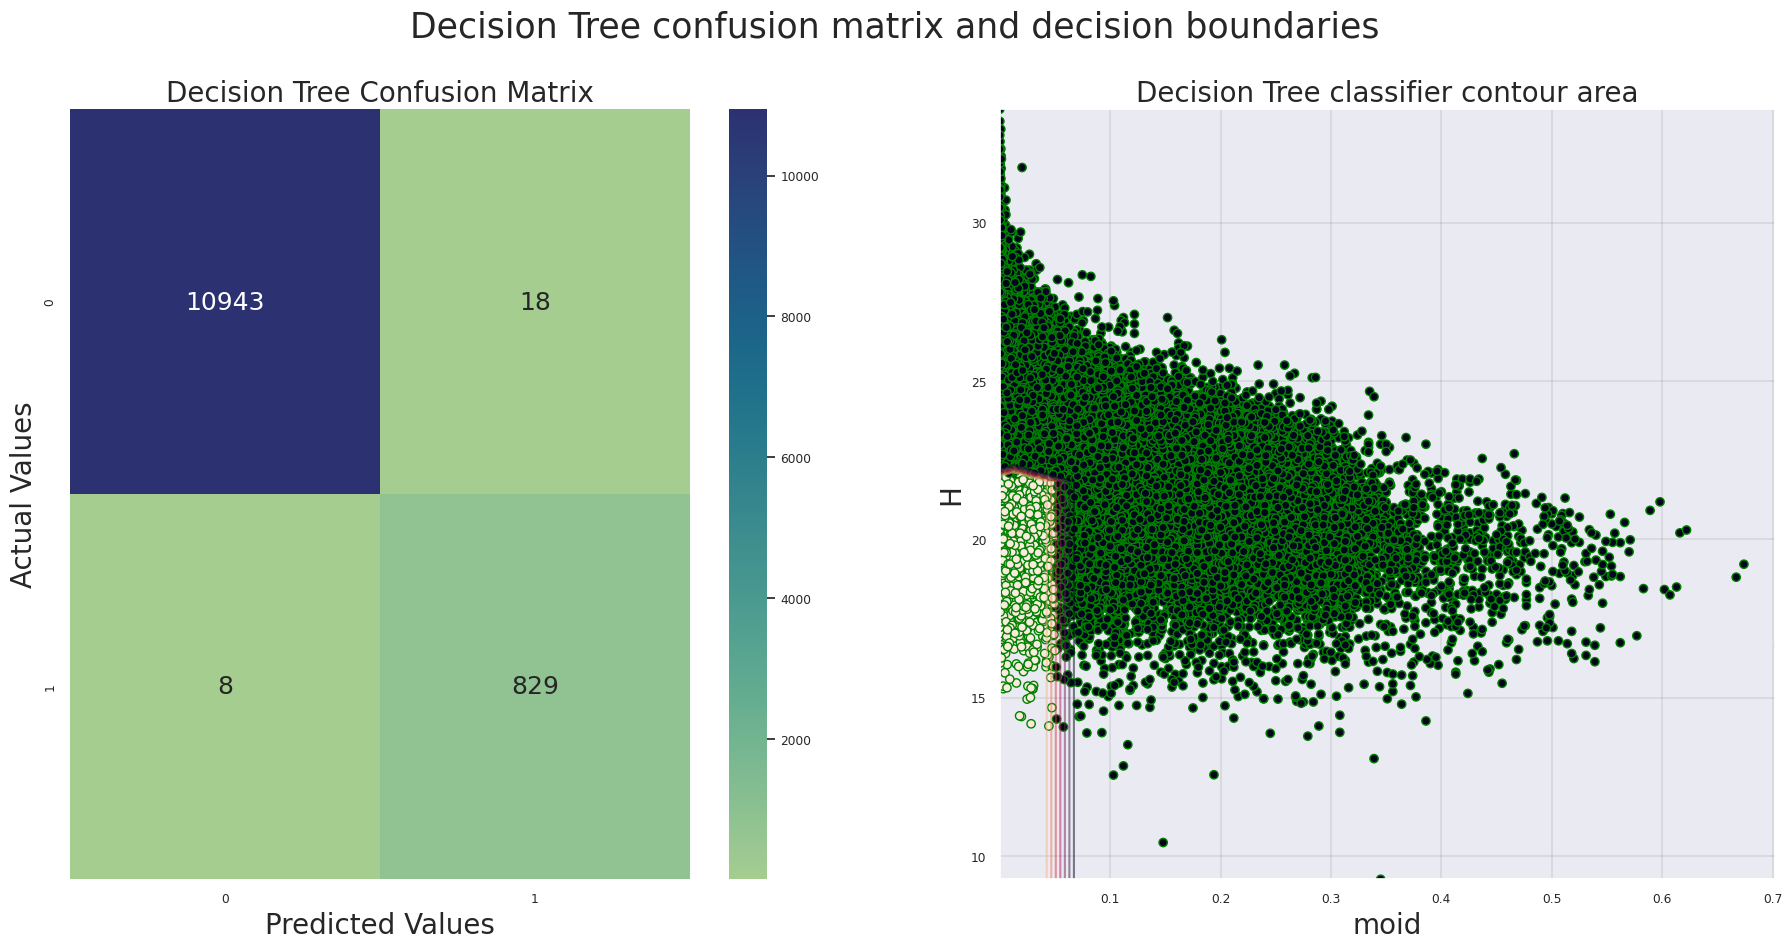

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2,figsize=(22,10))

fig.suptitle('Decision Tree confusion matrix and decision boundaries', fontsize=25)
plt.rcParams.update({'font.size': 18})
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=True , cmap="crest", ax=axes[0])
axes[0].set_xlabel('Predicted Values', fontsize=20)
axes[0].set_ylabel('Actual Values', fontsize=20)
axes[0].set_title('Decision Tree Confusion Matrix', fontsize=20)

classifier = model_dt.fit(X, y)
x_min=X['moid'].min()
x_max=X['moid'].max()
y_min=X['H'].min()
y_max=X['H'].max()
axes[1].set(xlim=(x_min, x_max), ylim=(y_min, y_max))
common_params = {"estimator": classifier, "X": X, "ax": axes[1]}
DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict", plot_method="contour", 
                                       xlabel="moid", ylabel='H', alpha=0.5)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="green")
plt.xlim(xx.min(), xx.max())
axes[1].set_xlabel('moid', fontsize=20)
axes[1].set_ylabel('H', fontsize=20)
axes[1].set_title('Decision Tree classifier contour area', fontsize=20)
axes[1].grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/Decision_Tree_Confusion_Matrix.png") 

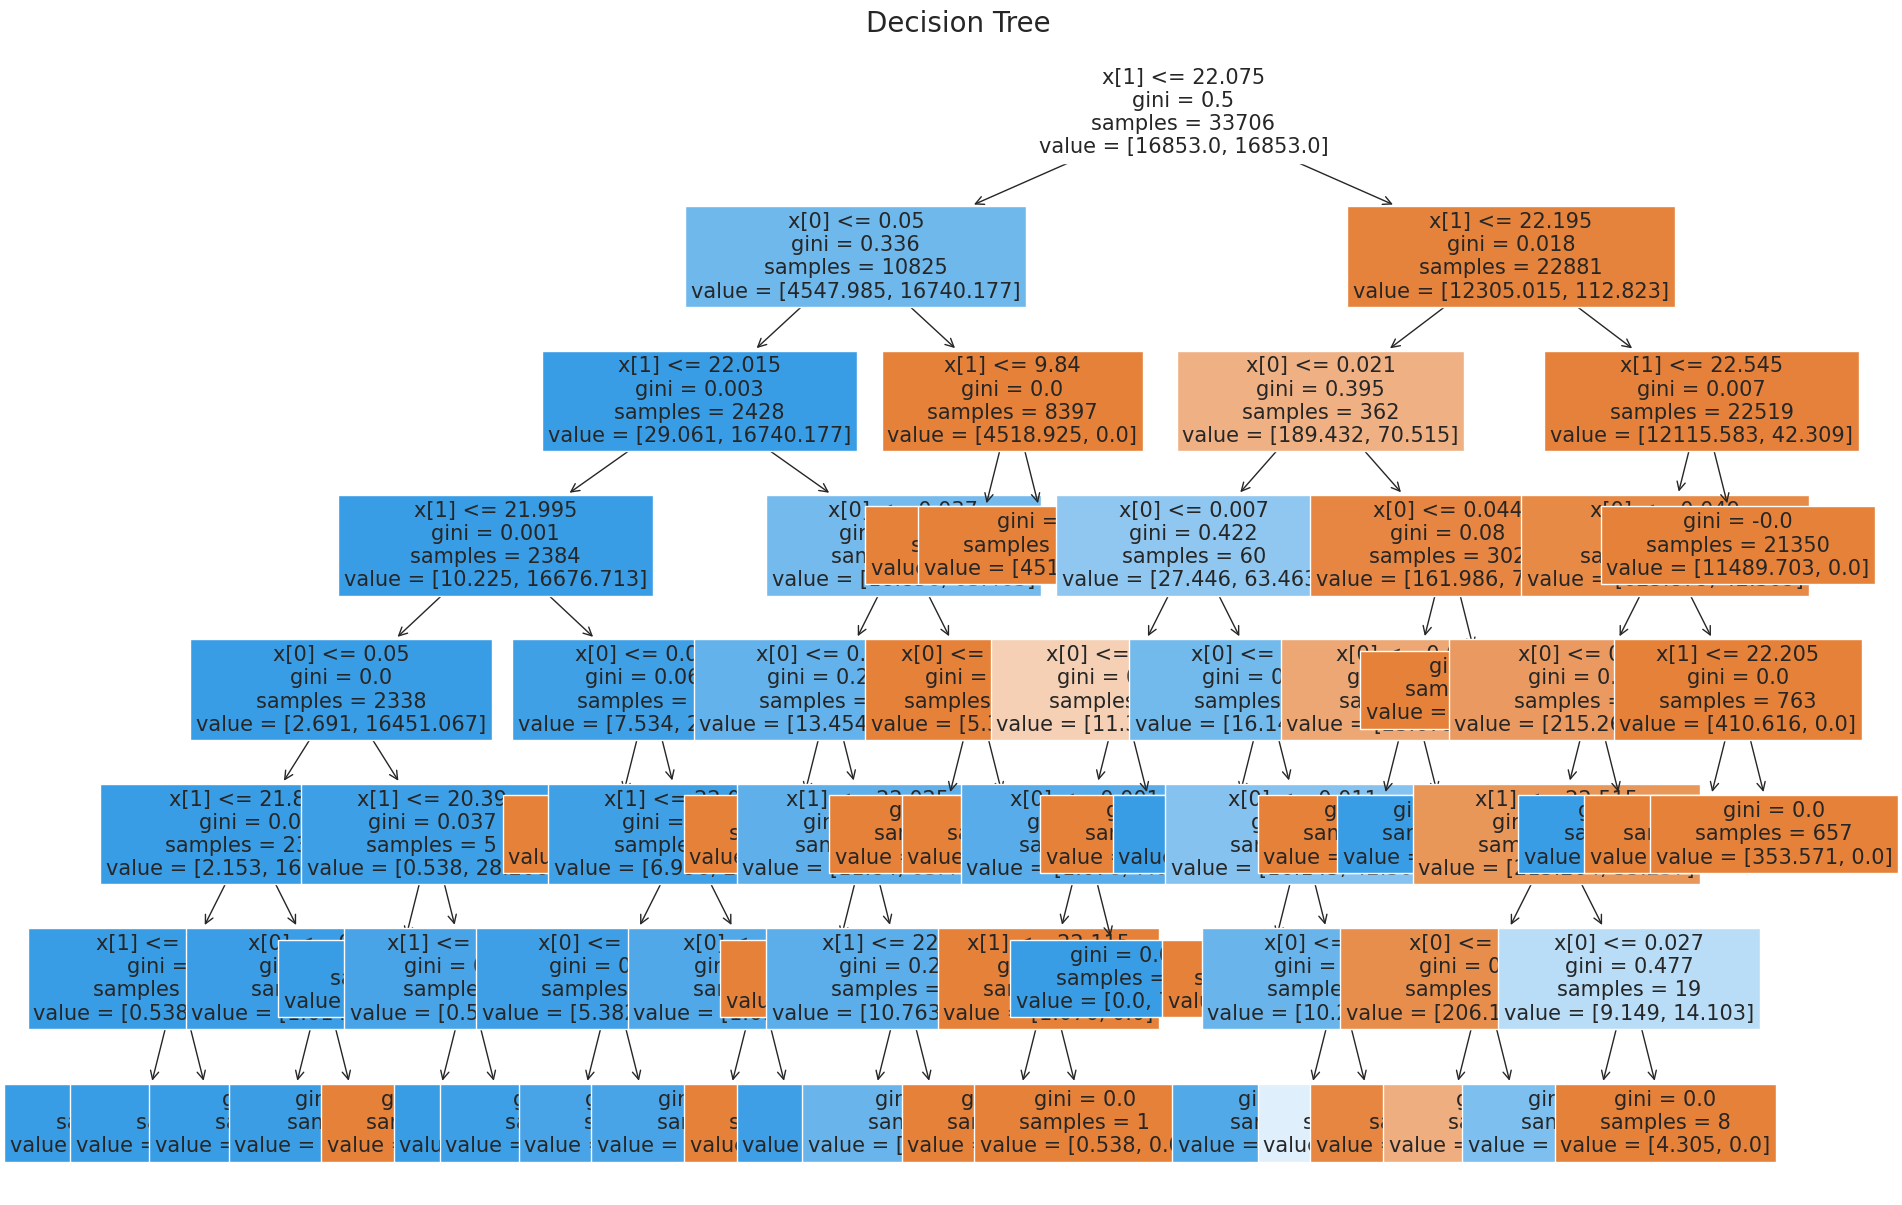

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.subplots(figsize=(22,15))
plot_tree(model_dt, filled=True, fontsize=15)
plt.title('Decision Tree', fontsize=20)
plt.savefig("images/Tree_diagram.png") 

## Accuratezza del modello

In [55]:
print ('Tutti gli algoritmi di classificazione con supervisione offrono un valore di accuratezza elevata.')
pd.options.display.float_format = '{:.7f}'.format
test_results

Tutti gli algoritmi di classificazione con supervisione offrono un valore di accuratezza elevata.


Model  Accuracy
0            SVM 0.9692321
1     KNeighbors 0.9977962
2  Decision Tree 0.9977962

# Classificazione dei NEA per tipo

### Suddivisione del dataset dei NEA in dati di addestramento e test

Suddivisione dei dati iniziali in training (40%) e test (60%) usati per la validazione 

Dati di input: 
- **a**
- **q**
- **Q**

Dati di output: 
- **APO**, **AMO**, **ATE**, **IEO** (0, 1, 2, 3)

Riscalare: 
- Uniformare i dati in un'unica scala commensurabile uguale ad ogni caratteristica

In [56]:
test_results_class = pd.DataFrame()
pd.options.display.float_format = '{:.5f}'.format

In [57]:
if isLinuxPlatform():
    df = pd.read_csv("data/sbdb_query_results.csv", low_memory=False)
else:
    df = pd.read_csv(r"data\sbdb_query_results.csv", low_memory=False)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

df = df[~df['pha'].isnull()]
df = df[~df['H'].isnull()]
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df.drop('BV', axis=1, inplace=True)
df.drop('UB', axis=1, inplace=True)
df.drop('per_y', axis=1, inplace=True)
df.rename(columns={"ad": "Q"}, inplace = True)
df = df[~df['q'].isnull()]
df = df[~df['Q'].isnull()]
df['full_name'] = df['full_name'].apply(lambda x: x.strip())
df = df.reset_index(drop=True)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print ('Codifica i tipi di classi con numeri')
value_map_d = {'APO': 0, 'AMO': 1, 'ATE': 2, 'IEO': 3}
df['class2']= df['class'].apply(lambda x: value_map_d.get(x))

MPC_NEO = df [['a','q','Q','class2']]
X = MPC_NEO[['a', 'q', 'Q']]
y = MPC_NEO['class2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=3)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
y_train.value_counts()

Codifica i tipi di classi con numeri


0    11377
1     7233
2     1594
3       19
Name: class2, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

model_dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10)
tree = model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

model_dt_accuracy = accuracy_score(y_test, y_pred)
print(f'DecisionTree Accuracy: {model_dt_accuracy}\n')
print (classification_report(y_test, y_pred))

DecisionTree Accuracy: 0.6504487131943929

              precision    recall  f1-score   support

           0       0.99      0.63      0.77      7585
           1       1.00      0.82      0.90      4823
           2       0.00      0.00      0.00      1062
           3       0.00      1.00      0.01        13

    accuracy                           0.65     13483
   macro avg       0.50      0.61      0.42     13483
weighted avg       0.91      0.65      0.76     13483



In [60]:
test_results_class = test_results_class.append({
    'Model':'Decision Tree', 
    'Accuracy':model_dt_accuracy, 
}, ignore_index=True,)

/tmp/ipykernel_7143/1249721621.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_class = test_results_class.append({


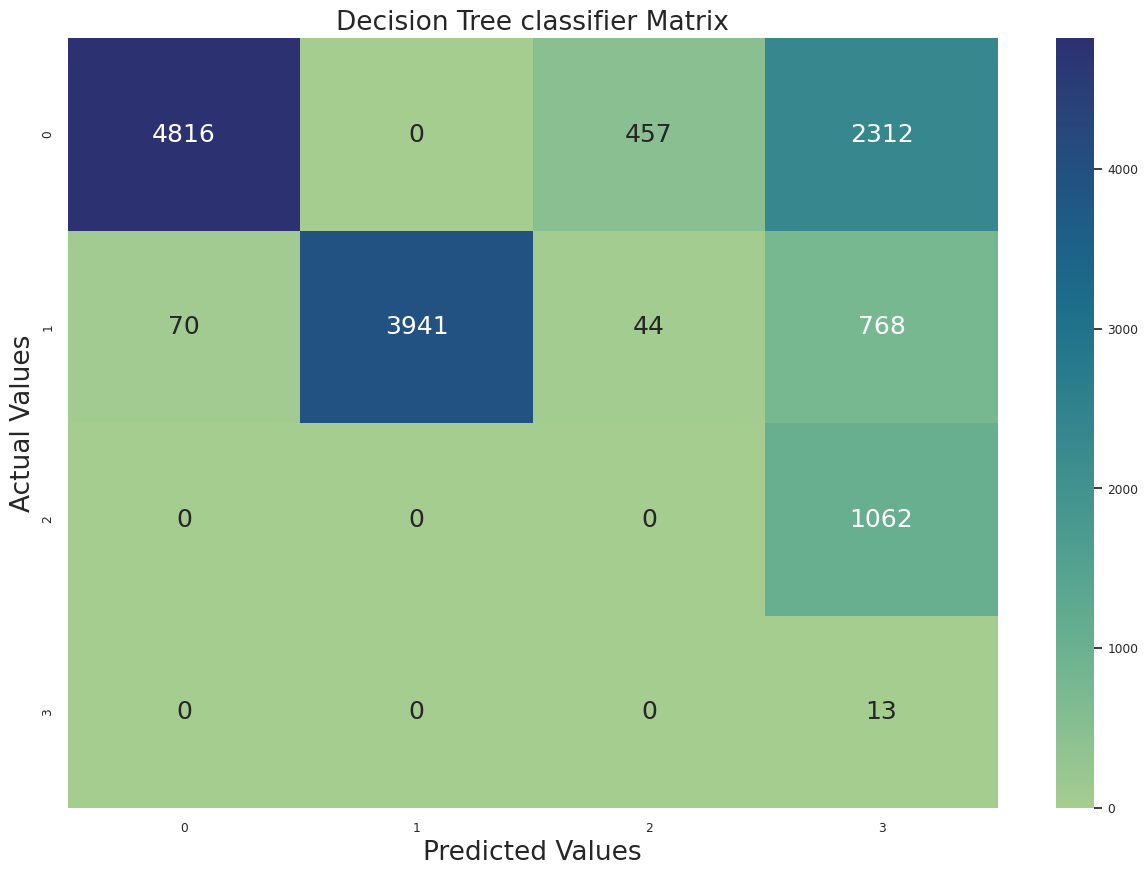

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 18})
cm_mlp = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=True , cmap="crest", ax=axes)
axes.set_xlabel('Predicted Values', fontsize=19)
axes.set_ylabel('Actual Values', fontsize=19)
axes.set_title('Decision Tree classifier Matrix', fontsize=19)
plt.savefig("images/Decision_Tree_Confusion_Matrix_Type.png") 

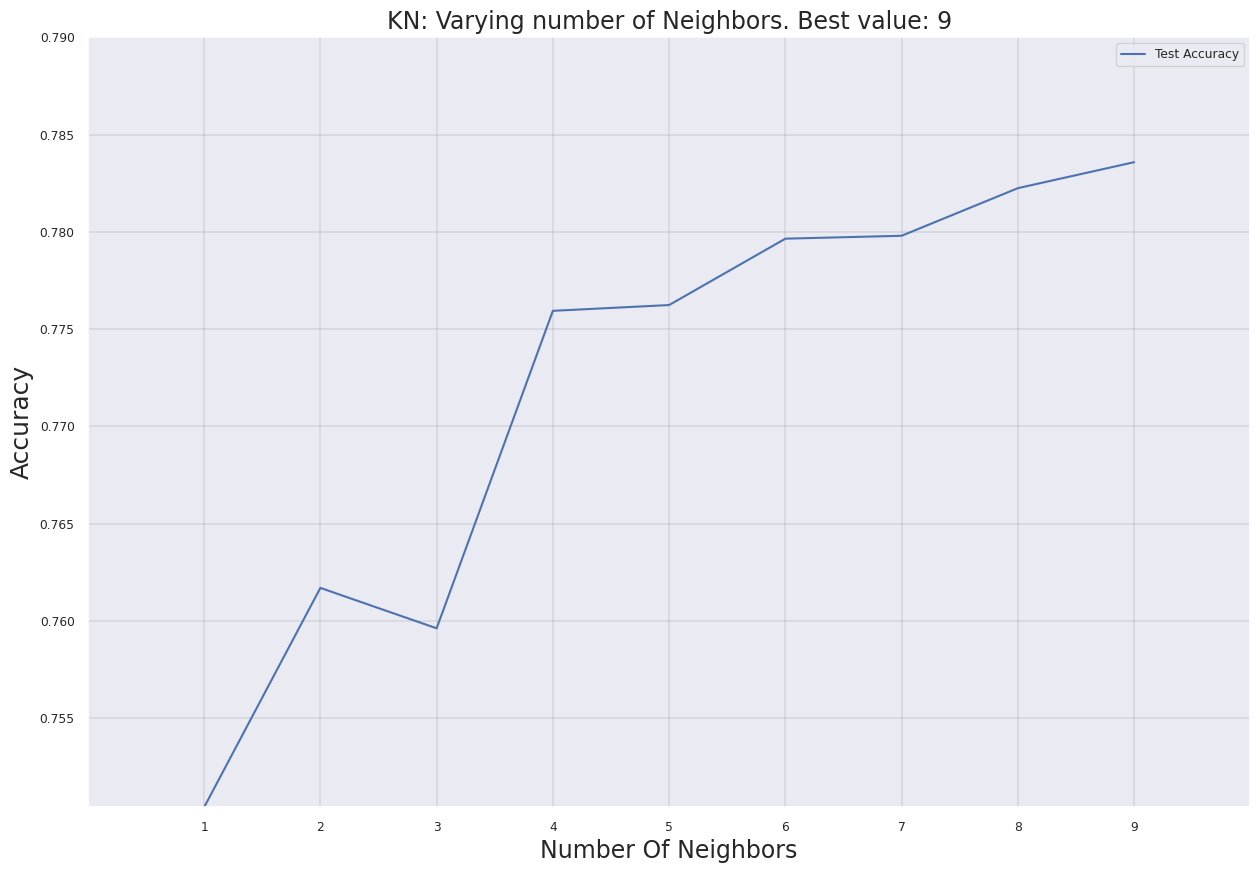

In [62]:
import matplotlib.pyplot as plt

test_score = {}
n_neighbors = np.arange(1, 10, 1)
min_value = 1
max_value = 0
for neighbor in n_neighbors:
    model_KN = KNeighborsClassifier(n_neighbors=neighbor)
    model_KN.fit(X_train, y_train)
    test_score[neighbor] = model_KN.score(X_test, y_test)

    minValue = test_score[neighbor]
    maxValue = test_score[neighbor]
    if minValue < min_value:
           min_value = minValue
    if maxValue > max_value:
           max_value = maxValue    
  
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors", fontsize=17)
plt.ylabel("Accuracy", fontsize=18)
plt.legend()
plt.xlim(0, 10)
plt.ylim(min_value, 0.79)

major_ticks = np.arange(1, 10, 1)
ax.set_xticks(major_ticks)

for key, value in test_score.items():
    if value==max(test_score.values()):
        break
plt.title(f"KN: Varying number of Neighbors. Best value: {key}", fontsize=17)
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/KNN_Optimum_K_NEA.png") 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

model_KN = KNeighborsClassifier(key)
model_KN.fit(X_train, y_train)
y_pred = model_KN.predict(X_test)

model_KN_accuracy = accuracy_score(y_test, y_pred)
print(f'KNeighbors Accuracy: {model_KN_accuracy}\n')
print (classification_report(y_test, y_pred))

KNeighbors Accuracy: 0.7835793221093228

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      7585
           1       0.99      0.95      0.97      4823
           2       0.27      0.84      0.41      1062
           3       0.03      0.38      0.05        13

    accuracy                           0.78     13483
   macro avg       0.56      0.71      0.55     13483
weighted avg       0.91      0.78      0.82     13483



In [64]:
test_results_class = test_results_class.append({
    'Model':'KNeighbor', 
    'Accuracy':model_KN_accuracy, 
}, ignore_index=True,)

/tmp/ipykernel_7143/802790103.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_class = test_results_class.append({


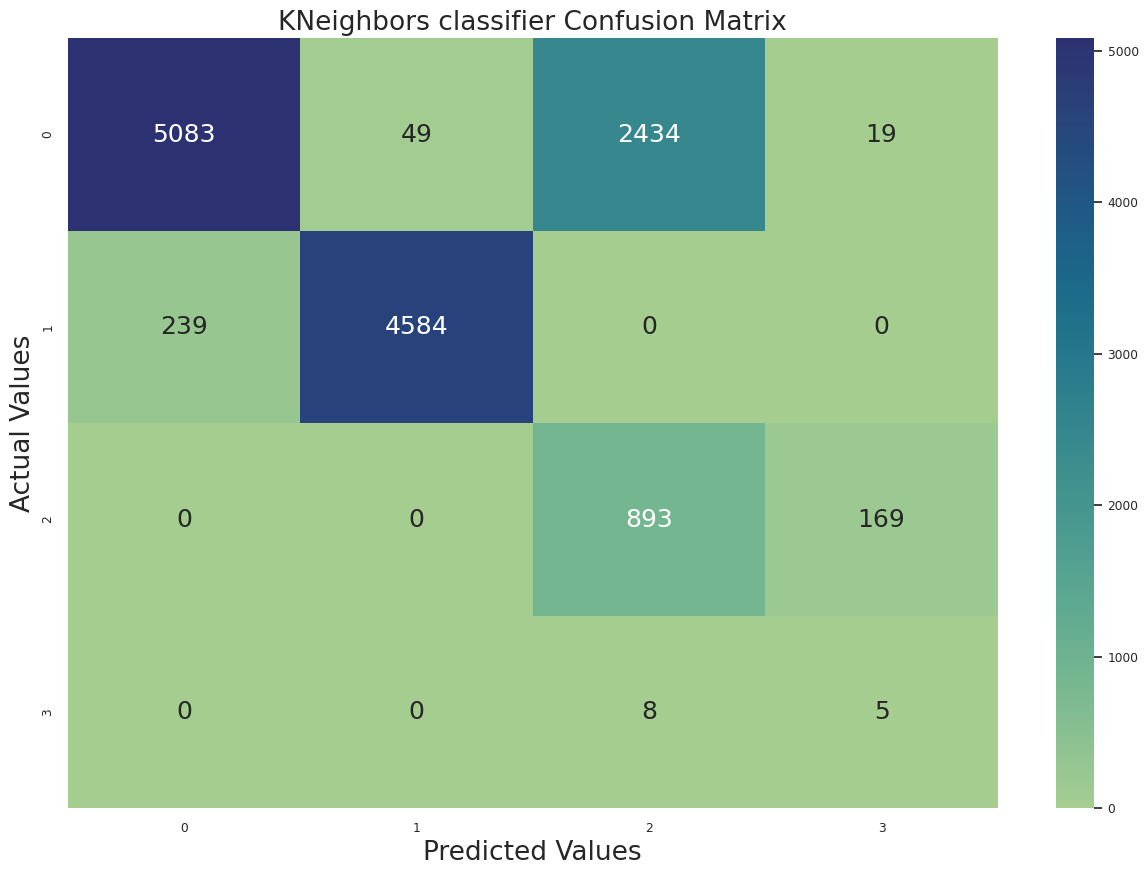

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 18})
cm_mlp = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=True , cmap="crest", ax=axes)
axes.set_xlabel('Predicted Values', fontsize=19)
axes.set_ylabel('Actual Values', fontsize=19)
axes.set_title('KNeighbors classifier Confusion Matrix', fontsize=19)
plt.savefig("images/KNeighbors_Confusion_Matrix_Type.png") 

### Random Forest model

Random Forest è un algoritmo che combina l'output di più strutture ad albero decisionali per raggiungere un unico risultato. Gestisce sia i problemi di classificazione che quelli di regressione.

Gli algoritmi Random Forest hanno tre iperparametri principali, che devono essere impostati prima dell'addestramento. 

- **dimensione dei nodi**
- **numero di strutture ad albero** 
- **numero di caratteristiche campionate**

Si costruisce una serie di strutture ad albero decisionali e ogni struttura ad albero è un insieme composto da un campione di dati tratto da un set di addestramento con sostituzione
La classificazione avviene a maggioranza: la variabile categoriale più frequente

<p style="text-align: center;">Fonte: <a href="http://www.ibm.com">http://www.ibm.com</a></p>
<center><img src="./figures/RandomForest.png" width="900" height="800" /></center>

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100]
}

grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_
grid_search.best_score_

classifier_rf = RandomForestClassifier(random_state=rf_best.random_state, n_jobs=rf_best.n_jobs, 
                                       max_depth=rf_best.max_depth, 
                                       n_estimators=rf_best.n_estimators, oob_score=True)
classifier_rf.fit(X_train, y_train)

y_pred = classifier_rf.predict(X_test)
model_rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {model_rf_accuracy}\n')
print (classification_report(y_test, y_pred))

Fitting 4 folds for each of 125 candidates, totalling 500 fits
Random Forest Accuracy: 0.7088185122005488

              precision    recall  f1-score   support

           0       0.99      0.63      0.77      7585
           1       1.00      0.98      0.99      4823
           2       0.00      0.00      0.00      1062
           3       0.00      1.00      0.01        13

    accuracy                           0.71     13483
   macro avg       0.50      0.65      0.44     13483
weighted avg       0.91      0.71      0.79     13483



In [67]:
test_results_class = test_results_class.append({
    'Model':'Random Forest', 
    'Accuracy':model_rf_accuracy, 
}, ignore_index=True,)

/tmp/ipykernel_7143/699398325.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_class = test_results_class.append({


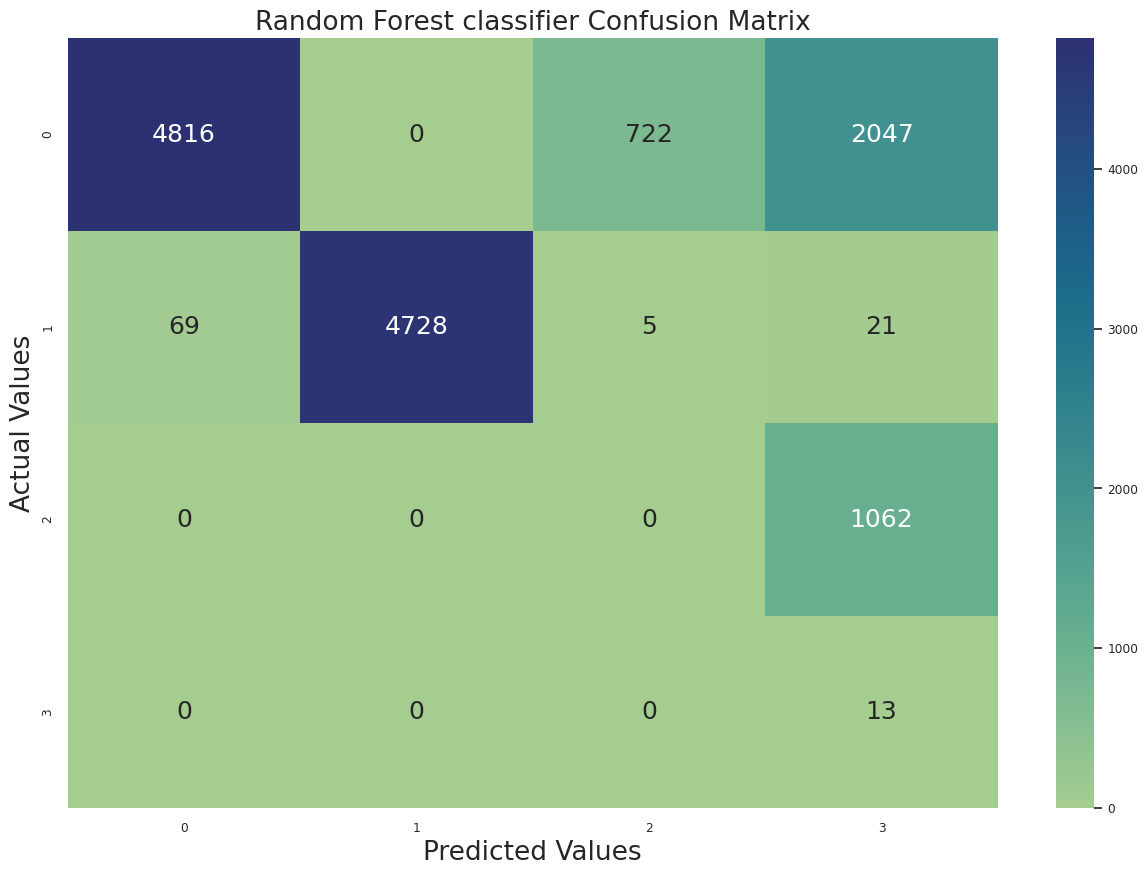

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 18})
cm_mlp = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=True , cmap="crest", ax=axes)
axes.set_xlabel('Predicted Values', fontsize=19)
axes.set_ylabel('Actual Values', fontsize=19)
axes.set_title('Random Forest classifier Confusion Matrix', fontsize=19)
plt.savefig("images/Random_Forest_Confusion_Matrix_Type.png") 

In [69]:
print ('Tutti gli algoritmi di classificazione con supervisione offrono un valore di accuratezza elevata.')
pd.options.display.float_format = '{:.7f}'.format
test_results_class

Tutti gli algoritmi di classificazione con supervisione offrono un valore di accuratezza elevata.


Model  Accuracy
0  Decision Tree 0.6504487
1      KNeighbor 0.7835793
2  Random Forest 0.7088185

# Vari passaggi NEA negli anni passati e prossimi futuri

Lista avvicinamenti NEO a minima distanza per gli anni dal 2018 fino al 2030 con diametro noto

- per anno
- per mese

Per anni inferiori al 2023 agli avvicinamenti sono già avvenuti, per anni futuri si tratta di proiezioni in base alle orbite attuali

In [70]:
from datetime import date, timedelta
import requests
import calendar
import pickle
import os.path

fields = []

target_NEO_min_approach = {}

for year in range(2018, 2030):    
    fileName_neo = f"data\\neo_{year}.bin"       
    fileName_approach = f"data\\min_approach_{year}.bin" 
    if isLinuxPlatform():
        fileName_neo = f'data/neo_{year}.bin'
        fileName_approach = f'data/min_approach_{year}.bin'
        
    if (os.path.isfile(fileName_neo)) and (os.path.isfile(fileName_approach)):
        print (f'file: {fileName_approach} and {fileName_neo} already exist')
        continue
        
    daily_neo = {}
    daily_neo [year] = []
    print (f'Querying JPL NASA db for: {year}')
       
    date_min = str(year) + '-01-01'
    date_max = str(year) + '-12-31'

    parameters = {
        "date-min": date_min,
        "date-max": date_max,
        'diameter': 'true',            
        'fullname': 'true'
    }

    response = requests.get("https://ssd-api.jpl.nasa.gov/cad.api", params=parameters)
    res_code = response.status_code
    if res_code != 200:
        print (f"[{date_min},{date_max}] Generic error: {res_code}")
        break
    res_data = response.json()
    fields = res_data['fields']
    df_NEO_tmp = pd.DataFrame(res_data['data'], columns=fields)
    df_NEO_tmp['dist'] = df_NEO_tmp['dist'].astype('float64')
    m = df_NEO_tmp.loc[df_NEO_tmp['dist'] == df_NEO_tmp['dist'].min()].iloc[0].to_dict()
    orbital_parameter = []
    orbital_parameter.append(m['des'])
    orbital_parameter.append(m['fullname'])
    orbital_parameter.append(m['cd'])
    orbital_parameter.append(m['dist'])
    orbital_parameter.append(m['v_rel'])
    orbital_parameter.append(m['diameter'])
    target_NEO_min_approach[year] = orbital_parameter
        
    for month in range(1, 13):
        first = 1
        last = calendar.monthrange(year, month)[1]       
        date_min = str(year) + '-' + str (month).zfill(2) + '-' + str(first).zfill(2)
        date_max = str(year) + '-' + str (month).zfill(2) + '-' + str(last).zfill(2)

        parameters = {
            "date-min": date_min,
            "date-max": date_max,
            'diameter': 'true',            
            'fullname': 'true'
        }

        response = requests.get("https://ssd-api.jpl.nasa.gov/cad.api", params=parameters)
        res_code = response.status_code
        if res_code != 200:
            print (f"[{date_min},{date_max}] Generic error: {res_code}")
            break
        res_data = response.json()
        fields = res_data['fields']
        signature = res_data['signature']
        count = res_data['count']
        daily_neo[year].append(count)

    fileName_neo = f"data\\neo_{year}.bin"       
    fileName_approach = f"data\\min_approach_{year}.bin" 
    if isLinuxPlatform():
        fileName_neo = f'data/neo_{year}.bin'
        fileName_approach = f'data/min_approach_{year}.bin'
        
    file = open(fileName_neo, 'wb')
    pickle.dump(daily_neo[year], file)
    file.close()

    file = open(fileName_approach, 'wb')
    pickle.dump(target_NEO_min_approach[year], file)
    file.close()

file: data/min_approach_2018.bin and data/neo_2018.bin already exist
file: data/min_approach_2019.bin and data/neo_2019.bin already exist
file: data/min_approach_2020.bin and data/neo_2020.bin already exist
file: data/min_approach_2021.bin and data/neo_2021.bin already exist
file: data/min_approach_2022.bin and data/neo_2022.bin already exist
file: data/min_approach_2023.bin and data/neo_2023.bin already exist
file: data/min_approach_2024.bin and data/neo_2024.bin already exist
file: data/min_approach_2025.bin and data/neo_2025.bin already exist
file: data/min_approach_2026.bin and data/neo_2026.bin already exist
file: data/min_approach_2027.bin and data/neo_2027.bin already exist
file: data/min_approach_2028.bin and data/neo_2028.bin already exist
file: data/min_approach_2029.bin and data/neo_2029.bin already exist


In [71]:
import pickle
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import calendar

month_series={}
for i in range(0, 12):
    month_series[i] = calendar.month_name[i + 1]
    
df_count = pd.DataFrame()
df_target_NEO_min_approach = pd.DataFrame()

for year in range(2019, 2030):
    fileName_neo = ''    
    fileName_approach = ''
    if isLinuxPlatform():
        fileName_neo = f'data/neo_{year}.bin'
        fileName_approach = f'data/min_approach_{year}.bin'
    else:
        fileName_neo = f"data\\neo_{year}.bin" 
        fileName_approach = f"data\\min_approach_{year}.bin" 
    
    file = open(fileName_neo, 'rb')
    pickle_daily_neo = pickle.load(file)
    file.close()
    series = pd.Series(pickle_daily_neo)
    df_count[str(year)] =  series
    
    file = open(fileName_approach, 'rb')
    target_NEO_min_approach = pickle.load(file)
    series = pd.Series(target_NEO_min_approach)
    df_target_NEO_min_approach[str(year)] =  series
    file.close()   
    
df_count.rename(index=month_series, inplace=True)
df_target_NEO_min_approach = df_target_NEO_min_approach.T
df_target_NEO_min_approach.rename(columns={0: 'des', 1: 'fullname', 2: 'cd', 3: 'dist', 4: 'Velocity (Km/s)', 5: 'Diameter (Km)'}, inplace=True)
df_target_NEO_min_approach['dist'] = df_target_NEO_min_approach['dist'].astype('float64')
df_target_NEO_min_approach['Velocity (Km/s)'] = df_target_NEO_min_approach['Velocity (Km/s)'].astype('float')
df_target_NEO_min_approach['Diameter (Km)'] = df_target_NEO_min_approach['Diameter (Km)'].astype('float')
df_target_NEO_min_approach['dist'] = df_target_NEO_min_approach['dist'] * 149597870/384400

df_target_NEO_min_approach.reset_index(inplace=True)
df_target_NEO_min_approach = df_target_NEO_min_approach.rename(columns = {'index':'Year'})
df_target_NEO_min_approach['Year'] = df_target_NEO_min_approach['Year'].astype('int64')

print ("Lista dei NEA con il passaggio alla minima distanza per gli ultimi anni")
df_target_NEO_min_approach

Lista dei NEA con il passaggio alla minima distanza per gli ultimi anni


Year        des                   fullname                 cd      dist  \
0   2019  2019 UN13                (2019 UN13)  2019-Oct-31 14:45 0.0328133   
1   2020   2020 VT4                 (2020 VT4)  2020-Nov-13 17:21 0.0175482   
2   2021   2021 UA1                 (2021 UA1)  2021-Oct-25 03:07 0.0245231   
3   2022   2022 FD1                 (2022 FD1)  2022-Mar-25 09:13 0.0386174   
4   2023    2023 BU                  (2023 BU)  2023-Jan-27 00:29 0.0259287   
5   2024  2007 XB23                (2007 XB23)  2024-Dec-11 18:08 1.1592817   
6   2025   2022 SS2                 (2022 SS2)  2025-Sep-13 14:53 2.3740716   
7   2026   2013 GM3                 (2013 GM3)  2026-Apr-14 16:15 0.6777525   
8   2027     137108         137108 (1999 AN10)  2027-Aug-07 07:11 1.0141914   
9   2028     153814          153814 (2001 WN5)  2028-Jun-26 05:23 0.6470144   
10  2029      99942   99942 Apophis (2004 MN4)  2029-Apr-13 21:46 0.0988853   

    Velocity (Km/s)  Diameter (Km)  
0        12.8450934            NaN  
1        13.4271195            NaN  
2        15.8350069            NaN  
3        18.5120509            NaN  
4         9.2672387            NaN  
5         4.7659415            NaN  
6         7.2177511            NaN  
7         7.4095083            NaN  
8        26.2840540            NaN  
9        10.2426018      0.9320000  
10        7.4225373      0.3400000

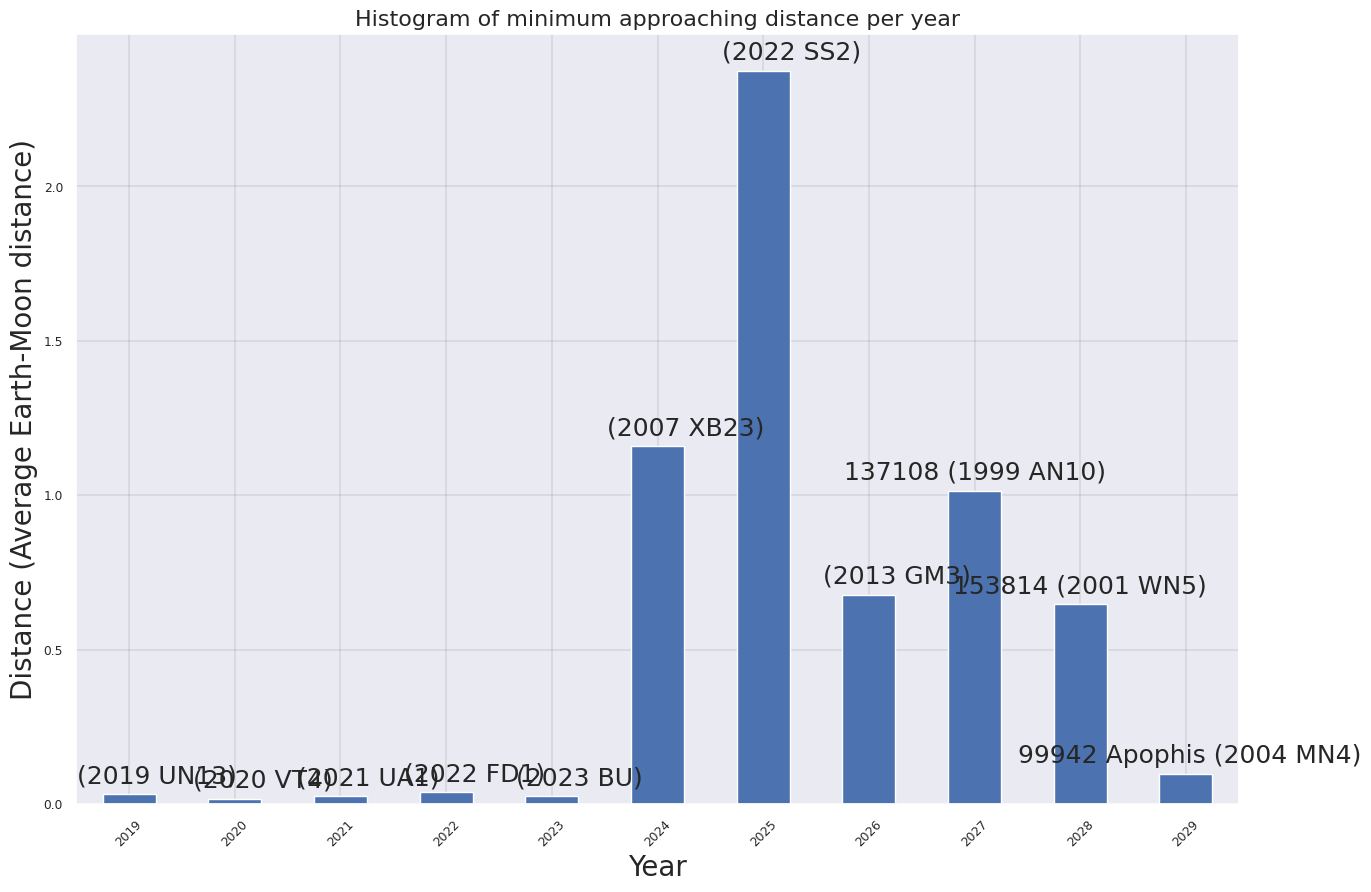

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
ser1 = df_target_NEO_min_approach['dist'].values.tolist()
n = df_target_NEO_min_approach['fullname'].values.tolist()
freq_series = pd.Series(ser1)

ax = freq_series.plot(kind='bar')
ax.set_title('Amount Frequency')
ax.set_xlabel('Amount ($)')
ax.set_ylabel('Frequency')

rects = ax.patches
labels = [f"{i}" for i in n]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 0.02, label, ha="center", va="bottom"
    )
ax.set_title('Histogram of minimum approaching distance per year', fontsize=16)
ax.set_ylabel('Distance (Average Earth-Moon distance)', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
year=df_target_NEO_min_approach['Year'].values.tolist()
ax.set_xticklabels(year, rotation=45)
ax.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/Histogram_minimum_approach_per_year.png") 

Orbita di avvicinamento di Apophis nel 2029 visto dall'alto del Sistema Solare


Ephemerides at 50 epochs from 2029-03-15 12:00:00.000 (TDB) to 2029-04-14 12:00:00.000 (TDB)

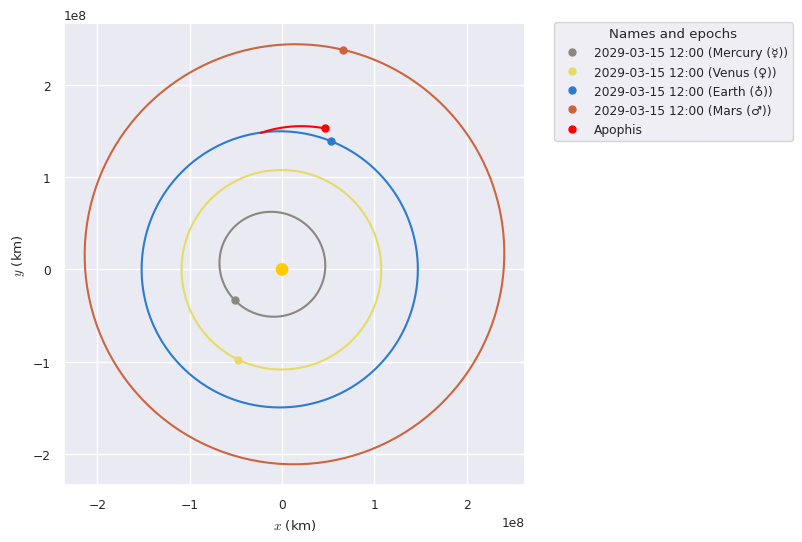

In [73]:
from astropy.utils.data import conf
conf.remote_timeout = 10000

from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris
from poliastro.bodies import Earth, Sun

solar_system_ephemeris.set("jpl")

from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system
from poliastro.twobody import Orbit
from poliastro.util import norm, time_range

EPOCH = Time("2029-03-15 12:00:00", scale="tdb")
epochs=time_range(EPOCH, end=EPOCH + 1 * 30 * u.day)
    
earth = Ephem.from_body(Earth, epochs, plane=Planes.EARTH_ECLIPTIC)
apophis = Ephem.from_horizons("Apophis", epochs, plane=Planes.EARTH_ECLIPTIC)

frame = plot_solar_system(outer=False, epoch=EPOCH, use_3d=False, interactive=False)
frame.plot_ephem(apophis, EPOCH, label="Apophis", color="#ff0000")

print ("Orbita di avvicinamento di Apophis nel 2029 visto dall'alto del Sistema Solare")
apophis

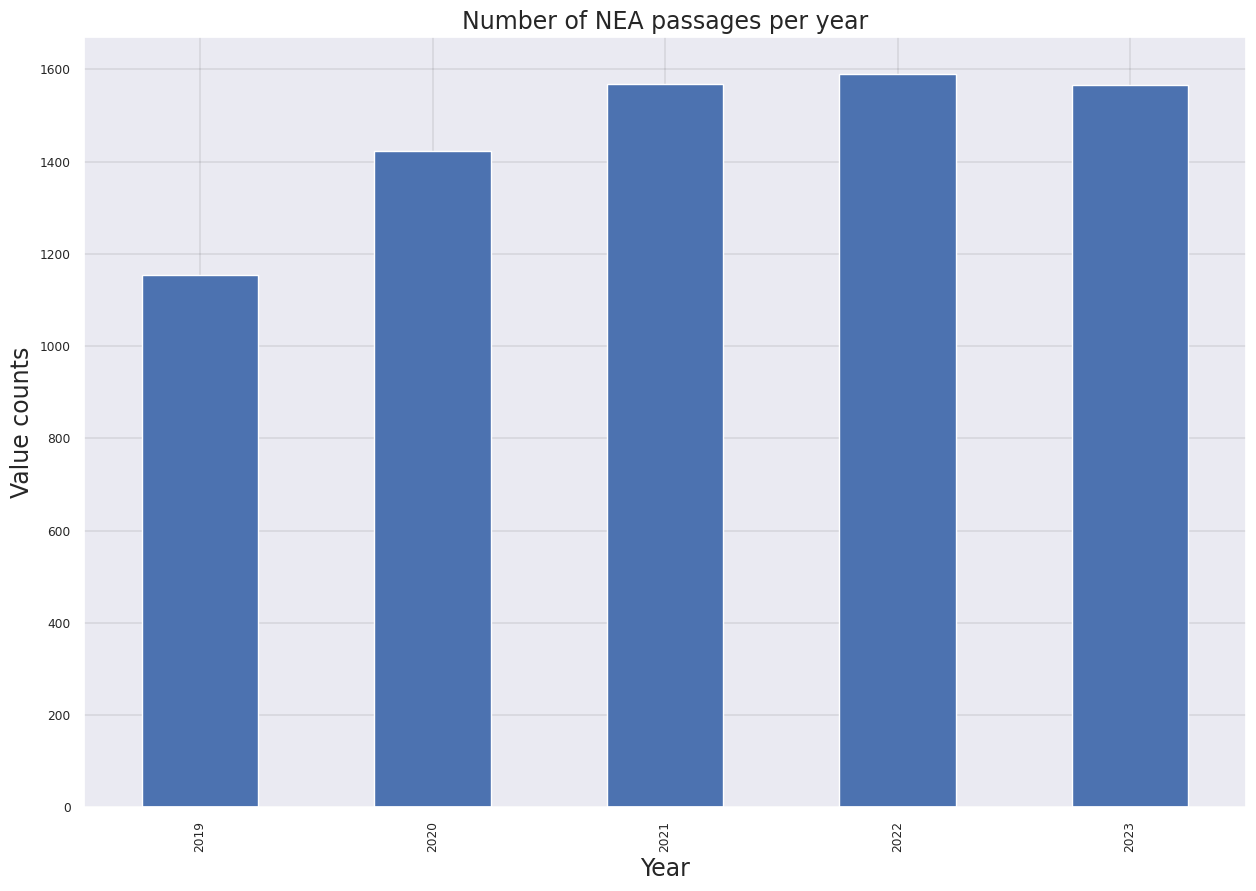

In [74]:
period = []
for year in range(2019, 2024):
    period.append(str(year))   
ax = df_count[period].sum().plot(y=period, kind="bar", figsize=(15, 10))
plt.rcParams.update({'font.size': 18})

ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('Value counts', fontsize=17)
ax.set_title('Number of NEA passages per year', fontsize=17)
ax.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/Histogram_passages_per_year.png") 

Istogramma del numero di passaggi NEA suddivisi per anno e mese

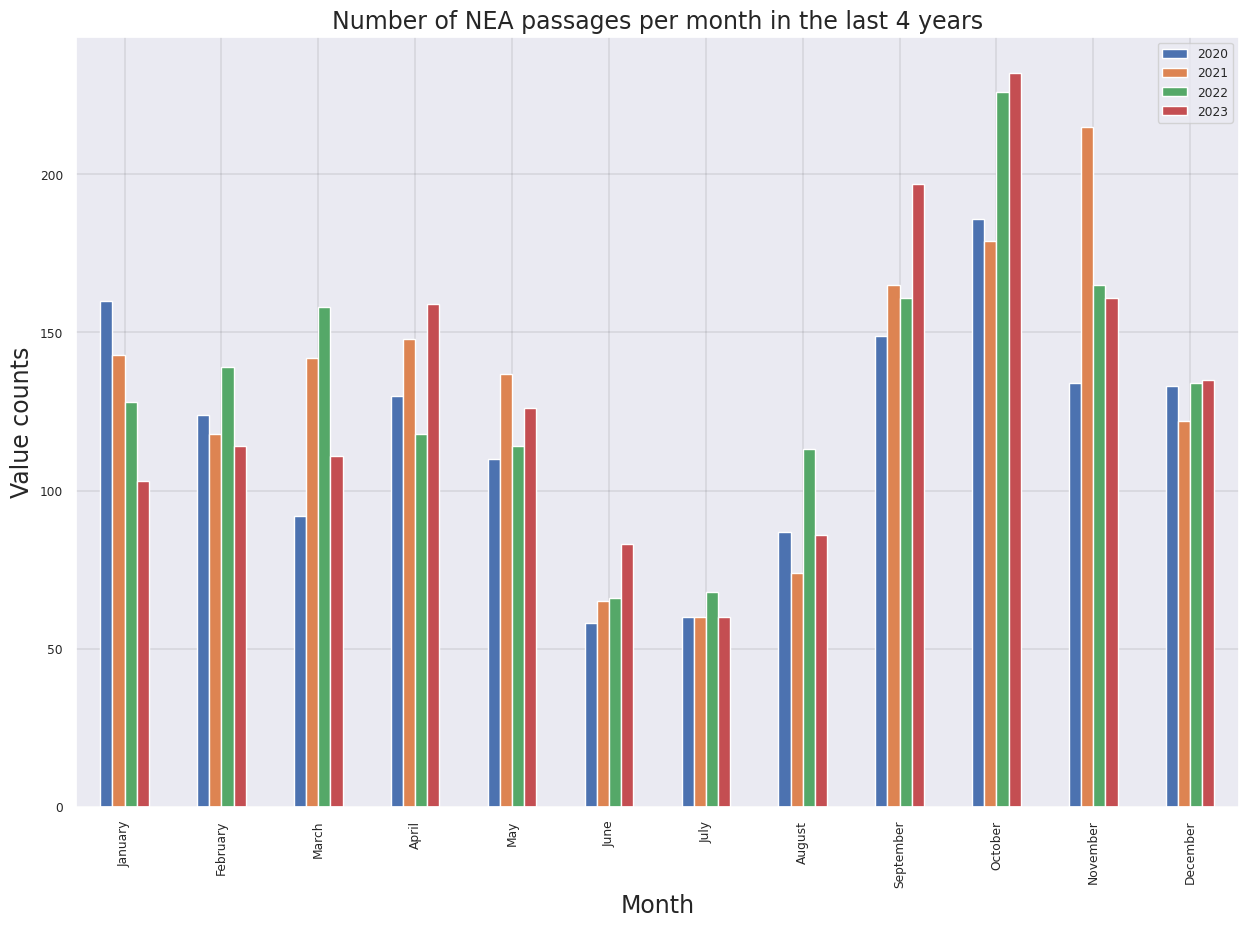

In [75]:
period = []
for year in range(2020, 2024):
    period.append(str(year))
ax = df_count.plot(y=period, kind="bar", figsize=(15, 10))
plt.rcParams.update({'font.size': 18})

ax.set_xlabel('Month', fontsize=17)
ax.set_ylabel('Value counts', fontsize=17)
ax.set_title('Number of NEA passages per month in the last 4 years', fontsize=17)
ax.legend(loc ="upper right")
ax.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/Histogram_passages_per_month.png") 

# Lista dei passaggi NEA nei primi giorni del 2024

In [76]:
import pandas as pd
from datetime import datetime

pd.options.display.float_format = '{:,.5f}'.format

date_min = date.today() - timedelta(days = 7)
date_max = date.today()  - timedelta(days = 0)

df_NEO_passage = pd.DataFrame()

parameters = {
    "date-min": date_min,
    "date-max": date_max,
    "neo": 'true',
    'fullname': 'true',
}

response = requests.get("https://ssd-api.jpl.nasa.gov/cad.api", params=parameters)
res_code = response.status_code
if res_code != 200:
    print (f"[{date_min},{date_max}] Generic error: {res_code}")
else:
    res_data = response.json()
    fields = res_data['fields']
    data = res_data['data']
    df_NEO_passage = pd.DataFrame(res_data['data'], columns=fields)
    df_NEO_passage['dist'] = df_NEO_passage['dist'].astype('float64')
    df_NEO_passage['jd'] = df_NEO_passage['jd'].astype('float64')
    df_NEO_passage['dist_min'] = df_NEO_passage['dist_min'].astype('float64')
    df_NEO_passage['dist_max'] = df_NEO_passage['dist_max'].astype('float64')
    df_NEO_passage['dist'] = df_NEO_passage['dist'].astype('float64')
    df_NEO_passage['v_rel'] = df_NEO_passage['v_rel'].astype('float')
    df_NEO_passage['h'] = df_NEO_passage['h'].astype('float64')
    df_NEO_passage['Earth-Moon distance'] = df_NEO_passage['dist'] * 149597870/384400
    df_NEO_passage.drop('v_inf', axis=1, inplace=True)
    df_NEO_passage.drop('t_sigma_f', axis=1, inplace=True)
    df_NEO_passage.drop('orbit_id', axis=1, inplace=True)
    df_NEO_passage.drop('dist_min', axis=1, inplace=True)
    df_NEO_passage.drop('dist_max', axis=1, inplace=True)
    df_NEO_passage.drop('jd', axis=1, inplace=True)
    df_NEO_passage.rename(columns={"v_rel": "Velocity (Km/s)"}, inplace = True)
    df_NEO_passage.rename(columns={"h": "Absolute Magnitude"}, inplace = True)
    df_NEO_passage.rename(columns={"diameter": "Diameter (Km)"}, inplace = True)

print (f'Found {df_NEO_passage.shape[0]} NEA passages from date: {date_min} to date: {date_max}')
df_NEO_passage

Found 20 NEA passages from date: 2024-01-11 to date: 2024-01-18


des                 cd    dist  Velocity (Km/s)  Absolute Magnitude  \
0   2024 AE4  2024-Jan-11 00:18 0.00814          8.22568            28.68800   
1   2024 AM4  2024-Jan-11 09:50 0.00080          3.19546            28.66300   
2   2020 AC1  2024-Jan-11 11:29 0.04939          5.31646            28.40000   
3   2024 AB4  2024-Jan-11 13:21 0.03819          2.95836            26.20000   
4   2024 AG4  2024-Jan-11 21:32 0.00228         11.96757            28.36600   
5   2023 WZ3  2024-Jan-11 23:30 0.04139          3.98656            25.03000   
6   2024 AR2  2024-Jan-12 03:45 0.00847         19.19486            26.39300   
7   2024 AW2  2024-Jan-13 12:11 0.02801          6.74387            26.37800   
8   2024 AR1  2024-Jan-13 14:28 0.02564          4.53038            26.00200   
9   2024 AQ4  2024-Jan-14 00:04 0.00832          9.79038            25.69100   
10  2024 AF3  2024-Jan-14 16:21 0.02247          6.73303            26.92300   
11  2024 AG3  2024-Jan-14 18:18 0.01136          9.79961            27.74500   
12  2024 AZ3  2024-Jan-14 20:23 0.00166         10.01887            28.74700   
13  2024 AT2  2024-Jan-15 10:50 0.00959          8.73844            27.30400   
14  2015 AK1  2024-Jan-15 23:22 0.04057         13.22431            24.18000   
15  2024 AH4  2024-Jan-16 16:18 0.03959          8.79362            25.76900   
16  2024 AB3  2024-Jan-16 23:23 0.01964         19.20642            26.53400   
17  2021 CZ2  2024-Jan-16 23:26 0.01999         14.35713            22.49000   
18  2024 AV4  2024-Jan-17 12:35 0.02218         15.46301            25.37300   
19   2024 BB  2024-Jan-17 16:55 0.02700         16.98857            26.15000   

             fullname  Earth-Moon distance  
0          (2024 AE4)              3.16635  
1          (2024 AM4)              0.31079  
2          (2020 AC1)             19.22104  
3          (2024 AB4)             14.86086  
4          (2024 AG4)              0.88567  
5          (2023 WZ3)             16.10794  
6          (2024 AR2)              3.29654  
7          (2024 AW2)             10.89928  
8          (2024 AR1)              9.97844  
9          (2024 AQ4)              3.23848  
10         (2024 AF3)              8.74507  
11         (2024 AG3)              4.42011  
12         (2024 AZ3)              0.64746  
13         (2024 AT2)              3.73192  
14         (2015 AK1)             15.78963  
15         (2024 AH4)             15.40764  
16         (2024 AB3)              7.64378  
17         (2021 CZ2)              7.77991  
18         (2024 AV4)              8.63322  
19          (2024 BB)             10.50625

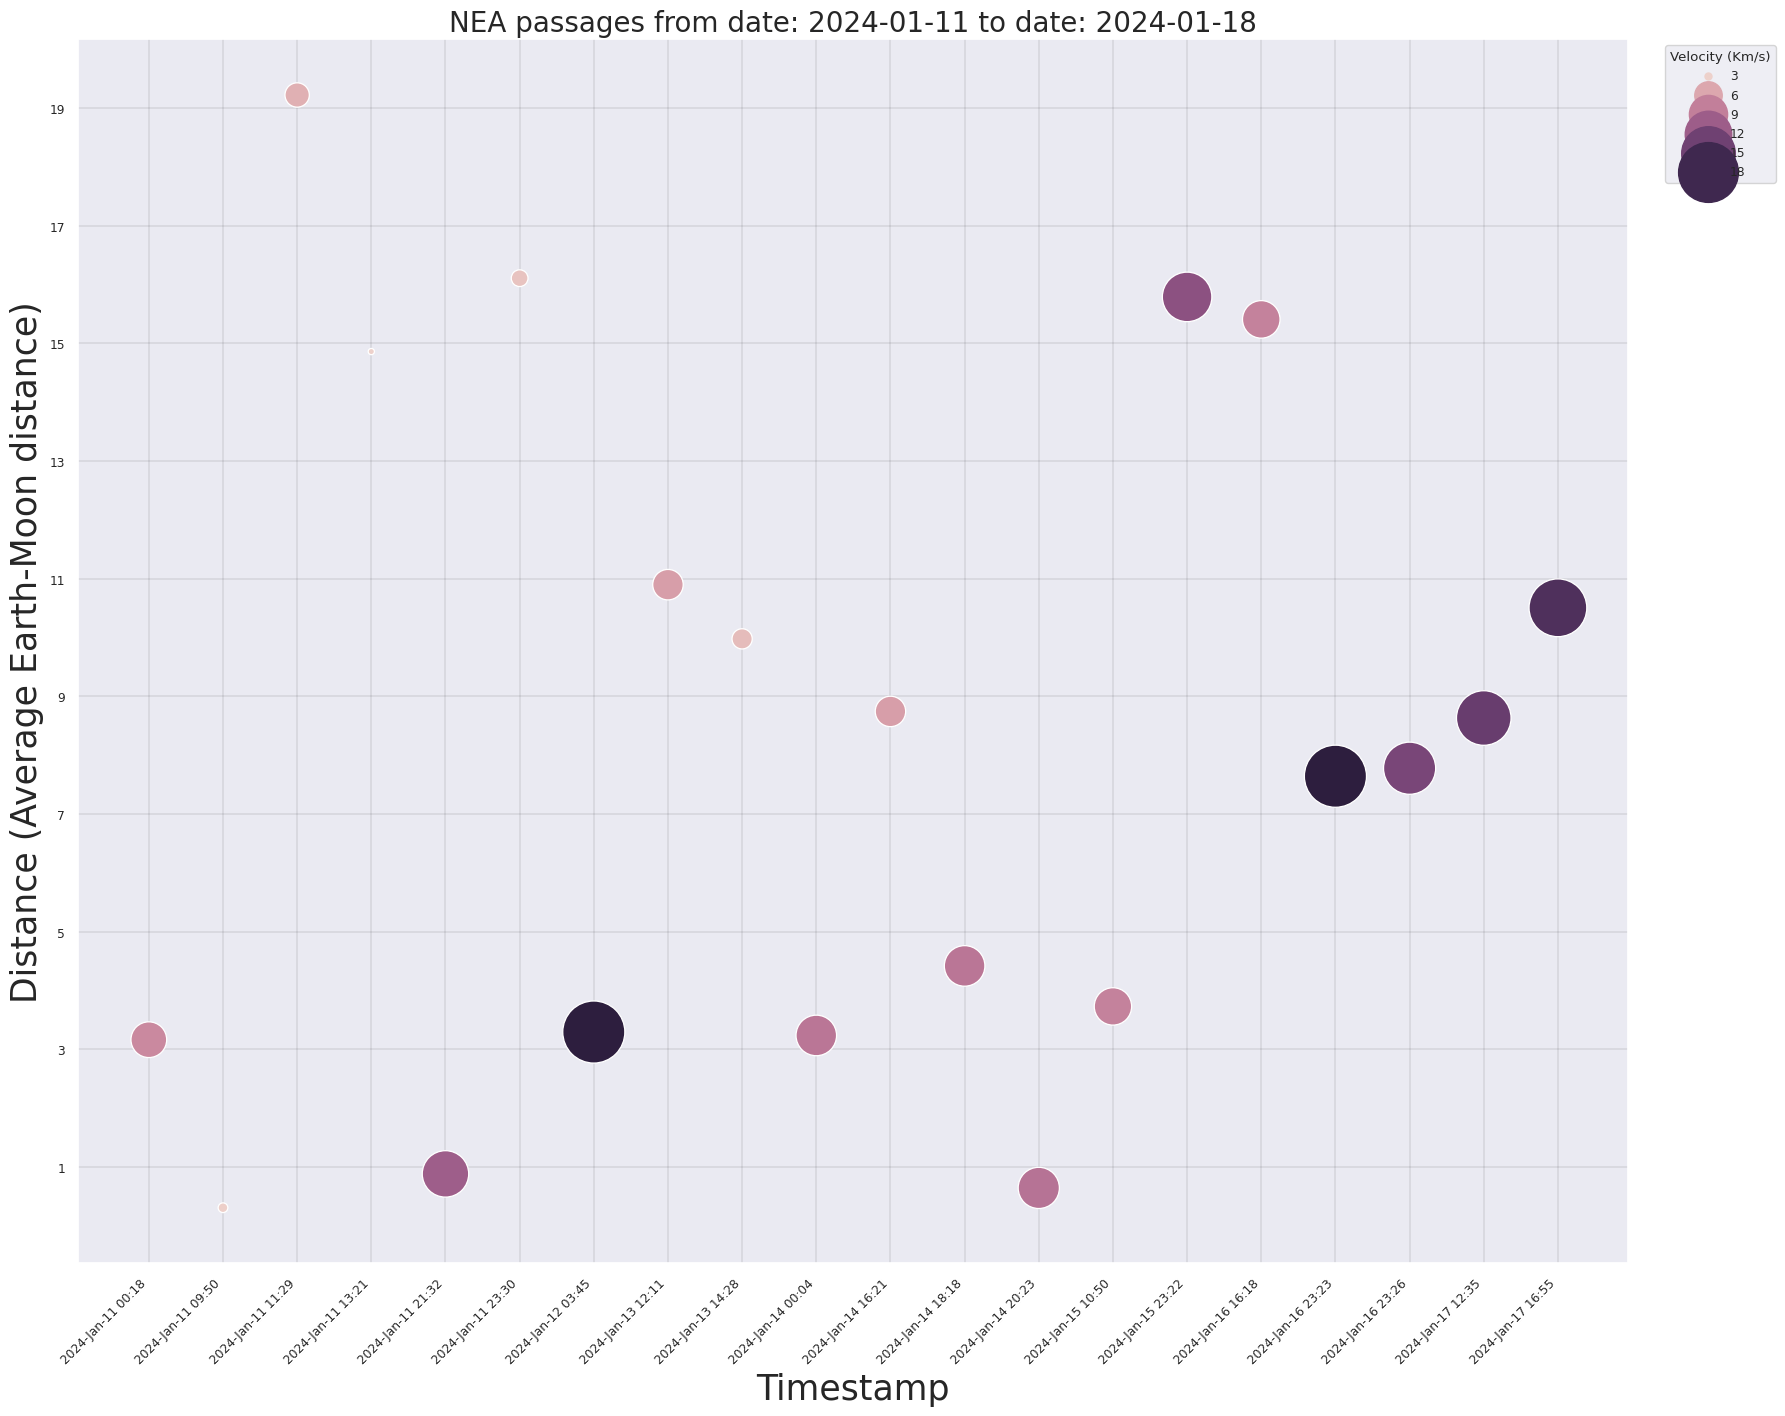

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(figsize=(20,18))
fig.autofmt_xdate(rotation=45)

g = sns.scatterplot(data=df_NEO_passage, x="cd", y="Earth-Moon distance", size="Velocity (Km/s)", sizes=(20, 2000), hue="Velocity (Km/s)", legend="brief")
g.legend(loc='upper left', title='Velocity (Km/s)',bbox_to_anchor=(1.02, 1))

axes.set_ylabel('Distance (Average Earth-Moon distance)', fontsize=25)
axes.set_xlabel("Timestamp", fontsize=25)
axes.set_title(f'NEA passages from date: {date_min} to date: {date_max}', fontsize=20)
major_ticks = np.arange(1, df_NEO_passage['Velocity (Km/s)'].max() + 1, 2)
minor_ticks = np.arange(1, df_NEO_passage['Velocity (Km/s)'].max() + 1, 1)
axes.set_yticks(major_ticks)
axes.set_yticks(minor_ticks, minor=True)
axes.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/Passage_NEA_end_year.png") 

## Passaggi NEA pericolosi per questo anno

In [78]:
import pandas as pd
from datetime import datetime, date, timedelta

pd.options.display.float_format = '{:,.5f}'.format

date_min = date.today()
date_max = date.today() + timedelta(days = 365)

In [79]:
import pandas as pd
from datetime import datetime, date, timedelta
import requests

parameters = {
    "neo": 'true',
    'diameter': 'true',
    'fullname': 'true',
    'pha': 'true',
    "date-max": date_max,
    'sort': 'date'
}
df_NEO_PHA_passage = pd.DataFrame()

response = requests.get("https://ssd-api.jpl.nasa.gov/cad.api", params=parameters)
res_code = response.status_code
if res_code != 200:
    print (f"[{date_min},{date_max}] Generic error: {res_code}")
else:
    res_data = response.json()
    fields = res_data['fields']
    data = res_data['data']
    df_NEO_PHA_passage = pd.DataFrame(res_data['data'], columns=fields)
    df_NEO_PHA_passage['dist'] = df_NEO_PHA_passage['dist'].astype('float64')
    df_NEO_PHA_passage['jd'] = df_NEO_PHA_passage['jd'].astype('float64')
    df_NEO_PHA_passage['dist_min'] = df_NEO_PHA_passage['dist_min'].astype('float64')
    df_NEO_PHA_passage['dist_max'] = df_NEO_PHA_passage['dist_max'].astype('float64')
    df_NEO_PHA_passage['dist'] = df_NEO_PHA_passage['dist'].astype('float64')
    df_NEO_PHA_passage['v_rel'] = df_NEO_PHA_passage['v_rel'].astype('float')
    df_NEO_PHA_passage['h'] = df_NEO_PHA_passage['h'].astype('float64')
    df_NEO_PHA_passage['Earth-Moon distance'] = df_NEO_PHA_passage['dist'] * 149597870/384400
    df_NEO_PHA_passage.drop('v_inf', axis=1, inplace=True)
    df_NEO_PHA_passage.drop('t_sigma_f', axis=1, inplace=True)
    df_NEO_PHA_passage.drop('orbit_id', axis=1, inplace=True)
    df_NEO_PHA_passage.drop('dist_min', axis=1, inplace=True)
    df_NEO_PHA_passage.drop('dist_max', axis=1, inplace=True)
    df_NEO_PHA_passage.drop('diameter_sigma', axis=1, inplace=True)
    df_NEO_PHA_passage.drop('jd', axis=1, inplace=True)
    df_NEO_PHA_passage.rename(columns={"v_rel": "Velocity (Km/s)"}, inplace = True)
    df_NEO_PHA_passage.rename(columns={"h": "Absolute Magnitude"}, inplace = True)
    df_NEO_PHA_passage.rename(columns={"diameter": "Diameter (Km)"}, inplace = True)    
df_NEO_PHA_passage

des                 cd    dist  Velocity (Km/s)  Absolute Magnitude  \
0    2008 OS7  2024-Feb-02 14:41 0.01908         18.16685            20.48000   
1    2019 CC5  2024-Feb-04 07:10 0.04904         14.95966            22.03000   
2    2023 SP1  2024-Feb-07 00:06 0.03665         11.79996            20.71000   
3   2020 BP13  2024-Apr-09 02:32 0.03886          6.80395            21.20000   
4      517681  2024-Apr-15 14:08 0.04699         14.18096            18.91000   
5      439437  2024-Apr-15 14:50 0.02177         16.48970            18.83000   
6    2022 TN1  2024-Apr-30 23:57 0.04766         17.73737            20.43000   
7      415029  2024-Jun-27 20:16 0.04439         25.88222            15.98000   
8   2011 AM24  2024-Jul-26 15:56 0.04311          6.20365            20.51000   
9      523664  2024-Jul-28 02:47 0.03822         23.68534            18.59000   
10  2013 FW13  2024-Sep-18 06:29 0.02172         15.55928            21.70000   
11     363027  2024-Oct-12 01:52 0.02380         16.62992            19.64000   
12     363305  2024-Oct-24 15:48 0.03021          4.87269            21.41000   
13    2020 WG  2024-Oct-28 01:57 0.02161          9.41521            21.73000   
14   2023 WK3  2024-Nov-18 14:02 0.04100         14.47382            20.54000   
15     447755  2024-Dec-03 23:16 0.03698         12.22260            19.77000   
16    2020 XR  2024-Dec-04 05:27 0.01477         12.30958            19.90000   
17   2020 BC6  2025-Jan-05 21:44 0.02462         22.18301            20.78000   

   Diameter (Km)             fullname  Earth-Moon distance  
0           None           (2008 OS7)              7.42483  
1           None           (2019 CC5)             19.08509  
2           None           (2023 SP1)             14.26434  
3           None          (2020 BP13)             15.12381  
4           None  517681 (2015 DE198)             18.28646  
5           None    439437 (2013 NK4)              8.47213  
6           None           (2022 TN1)             18.54963  
7           None   415029 (2011 UL21)             17.27675  
8          0.511          (2011 AM24)             16.77739  
9          0.346    523664 (2012 OD1)             14.87333  
10          None          (2013 FW13)              8.45346  
11         0.578   363027 (1998 ST27)              9.26404  
12          None   363305 (2002 NV16)             11.75649  
13          None            (2020 WG)              8.41008  
14          None           (2023 WK3)             15.95532  
15          None    447755 (2007 JX2)             14.39161  
16          None            (2020 XR)              5.74745  
17          None           (2020 BC6)              9.58214

<p style="text-align: center;">Fonte: <a href="https://cneos.jpl.nasa.gov/ca/">https://cneos.jpl.nasa.gov/ca/</a></p>
<center><img src="./figures/Approach.png" width="1500" height="1400" /></center>

In [80]:
df_NEO_PHA_passage.loc[df_NEO_PHA_passage['dist'] == df_NEO_PHA_passage['dist'].min()]

des                 cd    dist  Velocity (Km/s)  Absolute Magnitude  \
16  2020 XR  2024-Dec-04 05:27 0.01477         12.30958            19.90000   

   Diameter (Km)          fullname  Earth-Moon distance  
16          None         (2020 XR)              5.74745

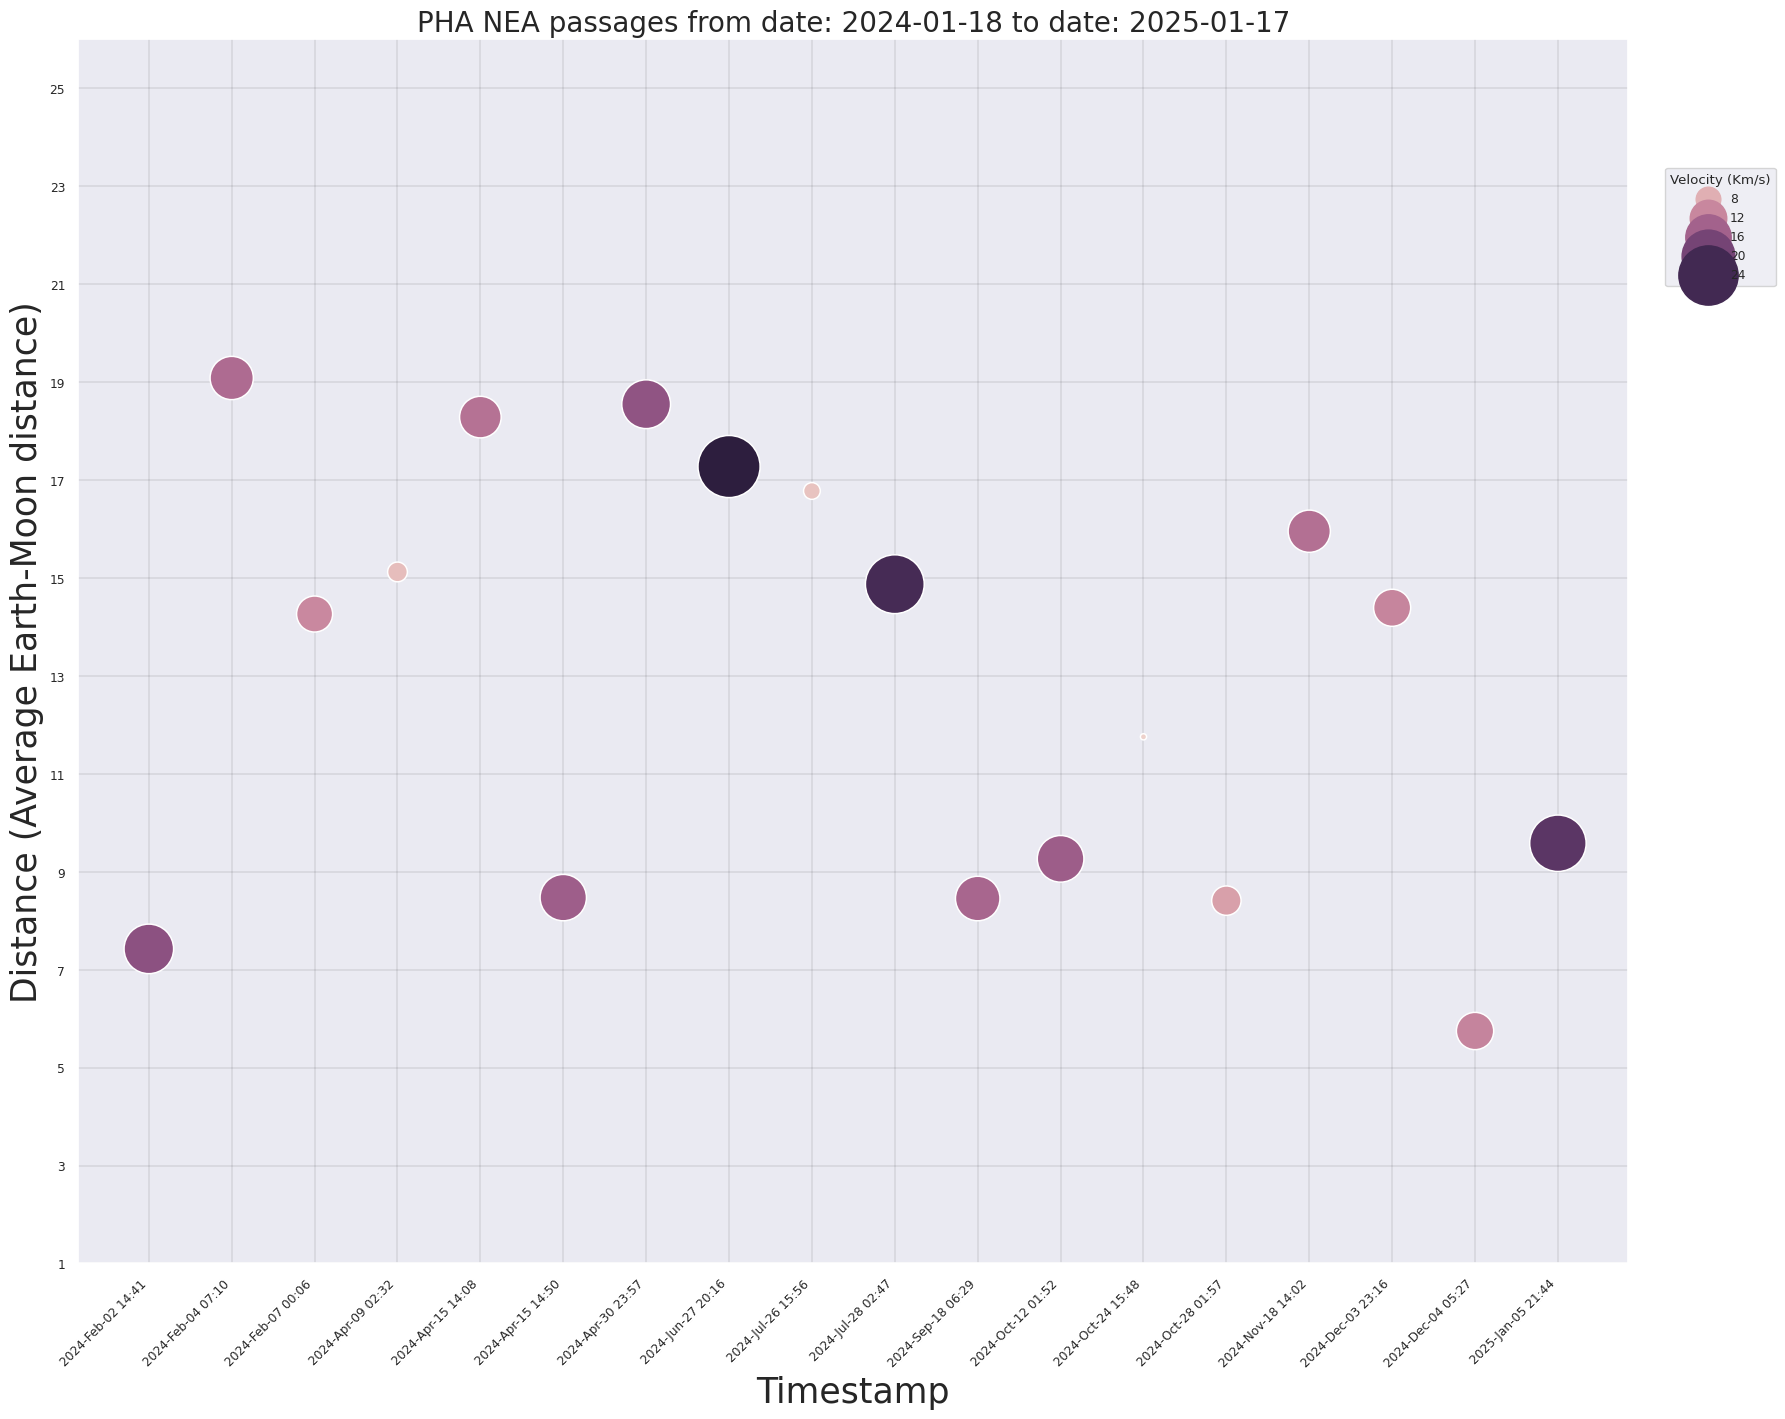

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(figsize=(20,18))
fig.autofmt_xdate(rotation=45)

axes.set_title(f'PHA NEA passages from date: {date_min} to date: {date_max}', fontsize=20)
g = sns.scatterplot(data=df_NEO_PHA_passage, x="cd", y="Earth-Moon distance", size="Velocity (Km/s)", sizes=(20, 2000), hue="Velocity (Km/s)", legend="brief")
g.legend(loc='upper left', title='Velocity (Km/s)',bbox_to_anchor=(1.02, 0.9))

axes.set_ylabel('Distance (Average Earth-Moon distance)', fontsize=25)
axes.set_xlabel("Timestamp", fontsize=25)
axes.set_title(f'PHA NEA passages from date: {date_min} to date: {date_max}', fontsize=20)

major_ticks = np.arange(1, df_NEO_PHA_passage['Velocity (Km/s)'].max() + 1, 2)
minor_ticks = np.arange(1, df_NEO_PHA_passage['Velocity (Km/s)'].max() + 1, 1)

axes.set_yticks(major_ticks)
axes.set_yticks(minor_ticks, minor=True)
axes.grid(color='black', linestyle='-', linewidth=0.1)
plt.savefig("images/Passage_NEA_PHA_next_year.png") 

Supponete che un asteroide on un diametro **compreso fra 10 e 20 Km** è destinato ad entrare in atmosfera e ad impattare sulla Terra. Avete a disposizione solo **una settimana** prima dell’incontro. Cosa fareste nel tempo rimasto?

<center><img src="./figures/Dinosaur.jpg" alt="drawing" width="550"/></center>

## Bibliografia

- https://cneos.jpl.nasa.gov/ca/
- https://ssd-api.jpl.nasa.gov/doc/cad.html
- https://github.com/afshimono/near_earth_object?tab=readme-ov-file
- https://asteroid.lowell.edu/
- http://www.ibm.com

### Database, tool, sky chart from ESA 

- https://neo.ssa.esa.int/neo-toolkit
- https://neotools.ssa.esa.int/fvt
- https://neo.ssa.esa.int/neo-population-generator
- https://theskylive.com/near-earth-objects
- https://neotools.ssa.esa.int/scd/setup

### Past impactors
- https://neo.ssa.esa.int/past-impactors

- https://github.com/doguilmak/Nearest-Earth-Objects-Classification/blob/main/NASA_NEOs_ANN_Classification.ipynb
- https://poliastro-py.readthedocs.io/en/latest/examples/Using%20NEOS%20package.html#